In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy import stats
from scipy.stats import rankdata, norm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
import time, os, warnings, random, string, re, gc, sys

import category_encoders as ce

import lightgbm as lgb
import catboost as cb

import optuna.integration.lightgbm as lgbo
from lightgbm import LGBMRegressor
import warnings

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('../data/original/train.csv')
test_df = pd.read_csv('../data/original/test.csv')

In [4]:
# カテゴリ変数と数値変数を抜き出せるようにする
cat_features = ["cat" + str(i) for i in range(10)]
num_features = ["cont" + str(i) for i in range(14)]

In [6]:
train = train_df.copy()
test = test_df.copy()

In [7]:
# Encoding categorical features with OrdinalEncoder
for col in cat_features:
    encoder = OrdinalEncoder()
    train[col] = encoder.fit_transform(np.array(train[col]).reshape(-1, 1))
    test[col] = encoder.transform(np.array(test[col]).reshape(-1, 1))

In [8]:
train[cat_features].head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,13.0
1,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,14.0
2,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,5.0
3,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,10.0
4,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,13.0


In [9]:
test[cat_features].head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,4.0,8.0
1,0.0,1.0,0.0,2.0,1.0,2.0,0.0,4.0,2.0,7.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0,10.0
3,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,13.0
4,1.0,1.0,0.0,2.0,1.0,2.0,0.0,4.0,2.0,5.0


In [10]:
X = train.drop(["id", "target"], axis=1)
X_test = test.drop(["id"], axis=1)
y = train["target"]

In [22]:
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size=0.25)

In [13]:
dtrain = lgbo.Dataset(train_X,label=train_y)

In [23]:
dval = lgbo.Dataset(valid_X,label=valid_y)

In [19]:
params = {
 'objective': 'regression',
 'metric': 'rmse',
 'feature_pre_filter': False,
 'lambda_l1': 2.1324554005212664e-05,
 'lambda_l2': 7.486212839933644,
 'num_leaves': 251,
 'feature_fraction': 1.0,
 'bagging_fraction': 0.5337542240432858,
 'bagging_freq': 3,
 'min_child_samples': 20,
 'num_iterations': 5,
}

In [32]:
best_params,tuning_history = dict(),list()
booster = lgbo.train(opt_params,dtrain,valid_sets=dval,verbose_eval=100)



[I 2021-08-24 11:57:23,542] A new study created in memory with name: no-name-cc2c89c9-be36-4059-bbf4-bd39b3f8e950
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.719994
[200]	valid_0's rmse: 0.712431
[300]	valid_0's rmse: 0.706753
[400]	valid_0's rmse: 0.701333
[500]	valid_0's rmse: 0.696277
[600]	valid_0's rmse: 0.69151
[700]	valid_0's rmse: 0.686841
[800]	valid_0's rmse: 0.682207
[900]	valid_0's rmse: 0.677873


feature_fraction, val_score: 0.673735:  14%|#4        | 1/7 [00:05<00:34,  5.73s/it]

[1000]	valid_0's rmse: 0.673735
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.720046
[200]	valid_0's rmse: 0.712673
[300]	valid_0's rmse: 0.706923
[400]	valid_0's rmse: 0.701547
[500]	valid_0's rmse: 0.696566
[600]	valid_0's rmse: 0.691676
[700]	valid_0's rmse: 0.687085
[800]	valid_0's rmse: 0.682699
[900]	valid_0's rmse: 0.678418


feature_fraction, val_score: 0.673735:  29%|##8       | 2/7 [00:11<00:27,  5.48s/it]

[1000]	valid_0's rmse: 0.674335
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.720084
[200]	valid_0's rmse: 0.712504
[300]	valid_0's rmse: 0.706559
[400]	valid_0's rmse: 0.701107
[500]	valid_0's rmse: 0.695886
[600]	valid_0's rmse: 0.691098
[700]	valid_0's rmse: 0.686248
[800]	valid_0's rmse: 0.681683
[900]	valid_0's rmse: 0.677047


feature_fraction, val_score: 0.672849:  43%|####2     | 3/7 [00:16<00:22,  5.54s/it]

[1000]	valid_0's rmse: 0.672849
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.720294
[200]	valid_0's rmse: 0.712798
[300]	valid_0's rmse: 0.70699
[400]	valid_0's rmse: 0.701787
[500]	valid_0's rmse: 0.696783
[600]	valid_0's rmse: 0.692042
[700]	valid_0's rmse: 0.687512
[800]	valid_0's rmse: 0.683346
[900]	valid_0's rmse: 0.679158


feature_fraction, val_score: 0.672849:  57%|#####7    | 4/7 [00:21<00:16,  5.42s/it]

[1000]	valid_0's rmse: 0.67526
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.720611
[200]	valid_0's rmse: 0.713268
[300]	valid_0's rmse: 0.708224
[400]	valid_0's rmse: 0.703489
[500]	valid_0's rmse: 0.698956
[600]	valid_0's rmse: 0.694686
[700]	valid_0's rmse: 0.690603
[800]	valid_0's rmse: 0.686691
[900]	valid_0's rmse: 0.682786


feature_fraction, val_score: 0.672849:  71%|#######1  | 5/7 [00:29<00:12,  6.35s/it]

[1000]	valid_0's rmse: 0.679056
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.720147
[200]	valid_0's rmse: 0.712901
[300]	valid_0's rmse: 0.707536
[400]	valid_0's rmse: 0.702749
[500]	valid_0's rmse: 0.69806
[600]	valid_0's rmse: 0.693404
[700]	valid_0's rmse: 0.689161
[800]	valid_0's rmse: 0.68486
[900]	valid_0's rmse: 0.68083


feature_fraction, val_score: 0.672849:  86%|########5 | 6/7 [00:37<00:06,  6.69s/it]

[1000]	valid_0's rmse: 0.676939
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.720326
[200]	valid_0's rmse: 0.713119
[300]	valid_0's rmse: 0.707888
[400]	valid_0's rmse: 0.702888
[500]	valid_0's rmse: 0.698433
[600]	valid_0's rmse: 0.694107
[700]	valid_0's rmse: 0.690139
[800]	valid_0's rmse: 0.685918
[900]	valid_0's rmse: 0.681872


num_leaves, val_score: 0.672849:   0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.677898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.709549
[200]	valid_0's rmse: 0.694889
[300]	valid_0's rmse: 0.682646
[400]	valid_0's rmse: 0.671474
[500]	valid_0's rmse: 0.661229
[600]	valid_0's rmse: 0.65144
[700]	valid_0's rmse: 0.642084
[800]	valid_0's rmse: 0.633177
[900]	valid_0's rmse: 0.624332


num_leaves, val_score: 0.615988:   5%|5         | 1/20 [00:07<02:25,  7.64s/it]

[1000]	valid_0's rmse: 0.615988
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.707661
[200]	valid_0's rmse: 0.691696
[300]	valid_0's rmse: 0.678245
[400]	valid_0's rmse: 0.665617
[500]	valid_0's rmse: 0.654041
[600]	valid_0's rmse: 0.643167
[700]	valid_0's rmse: 0.633023
[800]	valid_0's rmse: 0.623313
[900]	valid_0's rmse: 0.613963


num_leaves, val_score: 0.604749:  10%|#         | 2/20 [00:16<02:29,  8.33s/it]

[1000]	valid_0's rmse: 0.604749
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.719692
[200]	valid_0's rmse: 0.711958
[300]	valid_0's rmse: 0.705983
[400]	valid_0's rmse: 0.700449
[500]	valid_0's rmse: 0.695095
[600]	valid_0's rmse: 0.690093
[700]	valid_0's rmse: 0.685353
[800]	valid_0's rmse: 0.680617
[900]	valid_0's rmse: 0.676068


num_leaves, val_score: 0.604749:  15%|#5        | 3/20 [00:21<01:58,  6.99s/it]

[1000]	valid_0's rmse: 0.671863
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.688218
[200]	valid_0's rmse: 0.658668
[300]	valid_0's rmse: 0.634442
[400]	valid_0's rmse: 0.612706
[500]	valid_0's rmse: 0.593247
[600]	valid_0's rmse: 0.57557
[700]	valid_0's rmse: 0.560312
[800]	valid_0's rmse: 0.545789
[900]	valid_0's rmse: 0.532303
[1000]	valid_0's rmse: 0.520584


num_leaves, val_score: 0.520584:  20%|##        | 4/20 [00:33<02:19,  8.74s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.675851
[200]	valid_0's rmse: 0.638923
[300]	valid_0's rmse: 0.608855
[400]	valid_0's rmse: 0.583512
[500]	valid_0's rmse: 0.561863
[600]	valid_0's rmse: 0.542058
[700]	valid_0's rmse: 0.523682
[800]	valid_0's rmse: 0.50756
[900]	valid_0's rmse: 0.493898
[1000]	valid_0's rmse: 0.48147


num_leaves, val_score: 0.481470:  25%|##5       | 5/20 [00:47<02:39, 10.64s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.701454
[200]	valid_0's rmse: 0.681331
[300]	valid_0's rmse: 0.664245
[400]	valid_0's rmse: 0.648873
[500]	valid_0's rmse: 0.634519
[600]	valid_0's rmse: 0.621453
[700]	valid_0's rmse: 0.608933
[800]	valid_0's rmse: 0.596952
[900]	valid_0's rmse: 0.586327


num_leaves, val_score: 0.481470:  30%|###       | 6/20 [00:56<02:23, 10.25s/it]

[1000]	valid_0's rmse: 0.576181
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.684164
[200]	valid_0's rmse: 0.65218
[300]	valid_0's rmse: 0.626125
[400]	valid_0's rmse: 0.603346
[500]	valid_0's rmse: 0.582792
[600]	valid_0's rmse: 0.564266
[700]	valid_0's rmse: 0.547772
[800]	valid_0's rmse: 0.532143
[900]	valid_0's rmse: 0.518109
[1000]	valid_0's rmse: 0.50595


num_leaves, val_score: 0.481470:  35%|###5      | 7/20 [01:09<02:24, 11.14s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.675851
[200]	valid_0's rmse: 0.638923
[300]	valid_0's rmse: 0.608855
[400]	valid_0's rmse: 0.583512
[500]	valid_0's rmse: 0.561863
[600]	valid_0's rmse: 0.542058
[700]	valid_0's rmse: 0.523682
[800]	valid_0's rmse: 0.50756
[900]	valid_0's rmse: 0.493898
[1000]	valid_0's rmse: 0.48147


num_leaves, val_score: 0.481470:  40%|####      | 8/20 [01:26<02:33, 12.77s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.690856
[200]	valid_0's rmse: 0.66367
[300]	valid_0's rmse: 0.640684
[400]	valid_0's rmse: 0.620236
[500]	valid_0's rmse: 0.601696
[600]	valid_0's rmse: 0.584936
[700]	valid_0's rmse: 0.569743
[800]	valid_0's rmse: 0.555721
[900]	valid_0's rmse: 0.542774
[1000]	valid_0's rmse: 0.530638


num_leaves, val_score: 0.481470:  45%|####5     | 9/20 [01:36<02:13, 12.09s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.711615
[200]	valid_0's rmse: 0.698373
[300]	valid_0's rmse: 0.68717
[400]	valid_0's rmse: 0.67702
[500]	valid_0's rmse: 0.66724
[600]	valid_0's rmse: 0.65815
[700]	valid_0's rmse: 0.64935
[800]	valid_0's rmse: 0.64129
[900]	valid_0's rmse: 0.633508


num_leaves, val_score: 0.481470:  50%|#####     | 10/20 [01:42<01:42, 10.30s/it]

[1000]	valid_0's rmse: 0.625915
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.675277
[200]	valid_0's rmse: 0.638639
[300]	valid_0's rmse: 0.608116
[400]	valid_0's rmse: 0.582235
[500]	valid_0's rmse: 0.559579
[600]	valid_0's rmse: 0.538937
[700]	valid_0's rmse: 0.521248
[800]	valid_0's rmse: 0.505538
[900]	valid_0's rmse: 0.49121
[1000]	valid_0's rmse: 0.478338


num_leaves, val_score: 0.478338:  55%|#####5    | 11/20 [01:55<01:40, 11.16s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.675273
[200]	valid_0's rmse: 0.638408
[300]	valid_0's rmse: 0.608241
[400]	valid_0's rmse: 0.582545
[500]	valid_0's rmse: 0.560518
[600]	valid_0's rmse: 0.540224
[700]	valid_0's rmse: 0.522707
[800]	valid_0's rmse: 0.506922
[900]	valid_0's rmse: 0.493214
[1000]	valid_0's rmse: 0.481097


num_leaves, val_score: 0.478338:  60%|######    | 12/20 [02:08<01:33, 11.66s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.68095
[200]	valid_0's rmse: 0.647003
[300]	valid_0's rmse: 0.61963
[400]	valid_0's rmse: 0.595661
[500]	valid_0's rmse: 0.57423
[600]	valid_0's rmse: 0.555636
[700]	valid_0's rmse: 0.538484
[800]	valid_0's rmse: 0.52256
[900]	valid_0's rmse: 0.508366
[1000]	valid_0's rmse: 0.495594


num_leaves, val_score: 0.478338:  65%|######5   | 13/20 [02:20<01:21, 11.65s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.677244
[200]	valid_0's rmse: 0.641259
[300]	valid_0's rmse: 0.611991
[400]	valid_0's rmse: 0.587406
[500]	valid_0's rmse: 0.565349
[600]	valid_0's rmse: 0.544799
[700]	valid_0's rmse: 0.527667
[800]	valid_0's rmse: 0.511844
[900]	valid_0's rmse: 0.497707
[1000]	valid_0's rmse: 0.485473


num_leaves, val_score: 0.478338:  70%|#######   | 14/20 [02:33<01:11, 11.94s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.69487
[200]	valid_0's rmse: 0.670737
[300]	valid_0's rmse: 0.650133
[400]	valid_0's rmse: 0.631725
[500]	valid_0's rmse: 0.614441
[600]	valid_0's rmse: 0.598782
[700]	valid_0's rmse: 0.584419
[800]	valid_0's rmse: 0.570524
[900]	valid_0's rmse: 0.558128


num_leaves, val_score: 0.478338:  70%|#######   | 14/20 [02:42<01:11, 11.94s/it]

[1000]	valid_0's rmse: 0.546531


num_leaves, val_score: 0.478338:  75%|#######5  | 15/20 [02:42<00:55, 11.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.681484
[200]	valid_0's rmse: 0.648514
[300]	valid_0's rmse: 0.620835
[400]	valid_0's rmse: 0.597059
[500]	valid_0's rmse: 0.576039
[600]	valid_0's rmse: 0.557071
[700]	valid_0's rmse: 0.540059
[800]	valid_0's rmse: 0.524907
[900]	valid_0's rmse: 0.510744
[1000]	valid_0's rmse: 0.498188


num_leaves, val_score: 0.478338:  80%|########  | 16/20 [02:53<00:45, 11.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.675851
[200]	valid_0's rmse: 0.638923
[300]	valid_0's rmse: 0.608855
[400]	valid_0's rmse: 0.583512
[500]	valid_0's rmse: 0.561863
[600]	valid_0's rmse: 0.542058
[700]	valid_0's rmse: 0.523682
[800]	valid_0's rmse: 0.50756
[900]	valid_0's rmse: 0.493898
[1000]	valid_0's rmse: 0.48147


num_leaves, val_score: 0.478338:  85%|########5 | 17/20 [03:07<00:35, 11.95s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.685967
[200]	valid_0's rmse: 0.655309
[300]	valid_0's rmse: 0.630124
[400]	valid_0's rmse: 0.607859
[500]	valid_0's rmse: 0.587856
[600]	valid_0's rmse: 0.569762
[700]	valid_0's rmse: 0.55354
[800]	valid_0's rmse: 0.539086
[900]	valid_0's rmse: 0.525366
[1000]	valid_0's rmse: 0.512906


num_leaves, val_score: 0.478338:  90%|######### | 18/20 [03:20<00:24, 12.31s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.697703
[200]	valid_0's rmse: 0.674409
[300]	valid_0's rmse: 0.655286
[400]	valid_0's rmse: 0.638117
[500]	valid_0's rmse: 0.622475
[600]	valid_0's rmse: 0.607787
[700]	valid_0's rmse: 0.594199
[800]	valid_0's rmse: 0.581372
[900]	valid_0's rmse: 0.569259
[1000]	valid_0's rmse: 0.558035


num_leaves, val_score: 0.478338:  95%|#########5| 19/20 [03:32<00:12, 12.31s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.735917
[200]	valid_0's rmse: 0.732316
[300]	valid_0's rmse: 0.73006
[400]	valid_0's rmse: 0.728672
[500]	valid_0's rmse: 0.727535
[600]	valid_0's rmse: 0.726437
[700]	valid_0's rmse: 0.72549
[800]	valid_0's rmse: 0.72477
[900]	valid_0's rmse: 0.723997


bagging, val_score: 0.478338:   0%|          | 0/10 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.723217
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676549
[200]	valid_0's rmse: 0.639848
[300]	valid_0's rmse: 0.609556
[400]	valid_0's rmse: 0.583465
[500]	valid_0's rmse: 0.560057
[600]	valid_0's rmse: 0.539452
[700]	valid_0's rmse: 0.521424
[800]	valid_0's rmse: 0.505658
[900]	valid_0's rmse: 0.491786
[1000]	valid_0's rmse: 0.479146


bagging, val_score: 0.478338:  10%|#         | 1/10 [00:19<02:54, 19.42s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.677257
[200]	valid_0's rmse: 0.640632
[300]	valid_0's rmse: 0.610525
[400]	valid_0's rmse: 0.584525
[500]	valid_0's rmse: 0.562148
[600]	valid_0's rmse: 0.541648
[700]	valid_0's rmse: 0.524047
[800]	valid_0's rmse: 0.508186
[900]	valid_0's rmse: 0.49425
[1000]	valid_0's rmse: 0.481175


bagging, val_score: 0.478338:  20%|##        | 2/10 [00:37<02:29, 18.66s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676107
[200]	valid_0's rmse: 0.638952
[300]	valid_0's rmse: 0.608632
[400]	valid_0's rmse: 0.582162
[500]	valid_0's rmse: 0.559355
[600]	valid_0's rmse: 0.538529
[700]	valid_0's rmse: 0.520738
[800]	valid_0's rmse: 0.504786
[900]	valid_0's rmse: 0.490456
[1000]	valid_0's rmse: 0.477393


bagging, val_score: 0.477393:  30%|###       | 3/10 [00:55<02:06, 18.14s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.678176
[200]	valid_0's rmse: 0.641176
[300]	valid_0's rmse: 0.611818
[400]	valid_0's rmse: 0.585208
[500]	valid_0's rmse: 0.562651
[600]	valid_0's rmse: 0.543271
[700]	valid_0's rmse: 0.52488
[800]	valid_0's rmse: 0.508936
[900]	valid_0's rmse: 0.494234
[1000]	valid_0's rmse: 0.481412


bagging, val_score: 0.477393:  40%|####      | 4/10 [01:15<01:53, 18.92s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.679895
[200]	valid_0's rmse: 0.642827
[300]	valid_0's rmse: 0.612798
[400]	valid_0's rmse: 0.586665
[500]	valid_0's rmse: 0.564532
[600]	valid_0's rmse: 0.545441
[700]	valid_0's rmse: 0.527454
[800]	valid_0's rmse: 0.511154
[900]	valid_0's rmse: 0.496829
[1000]	valid_0's rmse: 0.484053


bagging, val_score: 0.477393:  50%|#####     | 5/10 [01:33<01:33, 18.75s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.678648
[200]	valid_0's rmse: 0.641746
[300]	valid_0's rmse: 0.612079
[400]	valid_0's rmse: 0.585973
[500]	valid_0's rmse: 0.562927
[600]	valid_0's rmse: 0.542949
[700]	valid_0's rmse: 0.5249
[800]	valid_0's rmse: 0.509014
[900]	valid_0's rmse: 0.49438
[1000]	valid_0's rmse: 0.481633


bagging, val_score: 0.477393:  60%|######    | 6/10 [01:53<01:16, 19.14s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.678495
[200]	valid_0's rmse: 0.64235
[300]	valid_0's rmse: 0.612209
[400]	valid_0's rmse: 0.586487
[500]	valid_0's rmse: 0.563381
[600]	valid_0's rmse: 0.543087
[700]	valid_0's rmse: 0.525185
[800]	valid_0's rmse: 0.509235
[900]	valid_0's rmse: 0.495371
[1000]	valid_0's rmse: 0.482546


bagging, val_score: 0.477393:  70%|#######   | 7/10 [02:13<00:57, 19.29s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.679132
[200]	valid_0's rmse: 0.643928
[300]	valid_0's rmse: 0.613694
[400]	valid_0's rmse: 0.587868
[500]	valid_0's rmse: 0.564948
[600]	valid_0's rmse: 0.544848
[700]	valid_0's rmse: 0.527529
[800]	valid_0's rmse: 0.511377
[900]	valid_0's rmse: 0.496803
[1000]	valid_0's rmse: 0.484657


bagging, val_score: 0.477393:  80%|########  | 8/10 [02:33<00:39, 19.72s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.677034
[200]	valid_0's rmse: 0.639665
[300]	valid_0's rmse: 0.610026
[400]	valid_0's rmse: 0.583715
[500]	valid_0's rmse: 0.561024
[600]	valid_0's rmse: 0.540241
[700]	valid_0's rmse: 0.522519
[800]	valid_0's rmse: 0.506709
[900]	valid_0's rmse: 0.49242
[1000]	valid_0's rmse: 0.479783


bagging, val_score: 0.477393:  90%|######### | 9/10 [02:53<00:19, 19.65s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.679931
[200]	valid_0's rmse: 0.644649
[300]	valid_0's rmse: 0.6155
[400]	valid_0's rmse: 0.590845
[500]	valid_0's rmse: 0.568357
[600]	valid_0's rmse: 0.549488
[700]	valid_0's rmse: 0.532105
[800]	valid_0's rmse: 0.516237
[900]	valid_0's rmse: 0.501749
[1000]	valid_0's rmse: 0.489179


feature_fraction_stage2, val_score: 0.477393:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676636
[200]	valid_0's rmse: 0.639858
[300]	valid_0's rmse: 0.61064
[400]	valid_0's rmse: 0.585101
[500]	valid_0's rmse: 0.56269
[600]	valid_0's rmse: 0.542298
[700]	valid_0's rmse: 0.524236
[800]	valid_0's rmse: 0.508548
[900]	valid_0's rmse: 0.494184
[1000]	valid_0's rmse: 0.481299


feature_fraction_stage2, val_score: 0.477393:  33%|###3      | 1/3 [00:17<00:35, 17.97s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676107
[200]	valid_0's rmse: 0.638952
[300]	valid_0's rmse: 0.608632
[400]	valid_0's rmse: 0.582162
[500]	valid_0's rmse: 0.559355
[600]	valid_0's rmse: 0.538529
[700]	valid_0's rmse: 0.520738
[800]	valid_0's rmse: 0.504786
[900]	valid_0's rmse: 0.490456
[1000]	valid_0's rmse: 0.477393


feature_fraction_stage2, val_score: 0.477393:  67%|######6   | 2/3 [00:36<00:18, 18.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676555
[200]	valid_0's rmse: 0.638985
[300]	valid_0's rmse: 0.609466
[400]	valid_0's rmse: 0.583565
[500]	valid_0's rmse: 0.5609
[600]	valid_0's rmse: 0.540728
[700]	valid_0's rmse: 0.523108
[800]	valid_0's rmse: 0.50703
[900]	valid_0's rmse: 0.492453
[1000]	valid_0's rmse: 0.479784


regularization_factors, val_score: 0.477393:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.677121
[200]	valid_0's rmse: 0.639971
[300]	valid_0's rmse: 0.610265
[400]	valid_0's rmse: 0.584365
[500]	valid_0's rmse: 0.561347
[600]	valid_0's rmse: 0.541475
[700]	valid_0's rmse: 0.523156
[800]	valid_0's rmse: 0.507479
[900]	valid_0's rmse: 0.493308
[1000]	valid_0's rmse: 0.480657


regularization_factors, val_score: 0.477393:   5%|5         | 1/20 [00:22<07:08, 22.56s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.67627
[200]	valid_0's rmse: 0.638928
[300]	valid_0's rmse: 0.608692
[400]	valid_0's rmse: 0.582719
[500]	valid_0's rmse: 0.55933
[600]	valid_0's rmse: 0.538943
[700]	valid_0's rmse: 0.521363
[800]	valid_0's rmse: 0.505438
[900]	valid_0's rmse: 0.491381
[1000]	valid_0's rmse: 0.478623


regularization_factors, val_score: 0.477393:  10%|#         | 2/20 [00:43<06:29, 21.63s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.679782
[200]	valid_0's rmse: 0.64486
[300]	valid_0's rmse: 0.616697
[400]	valid_0's rmse: 0.592489
[500]	valid_0's rmse: 0.571075
[600]	valid_0's rmse: 0.552197
[700]	valid_0's rmse: 0.535078
[800]	valid_0's rmse: 0.519737
[900]	valid_0's rmse: 0.505798
[1000]	valid_0's rmse: 0.493181


regularization_factors, val_score: 0.477393:  15%|#5        | 3/20 [01:06<06:14, 22.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676107
[200]	valid_0's rmse: 0.638952
[300]	valid_0's rmse: 0.608632
[400]	valid_0's rmse: 0.582162
[500]	valid_0's rmse: 0.559355
[600]	valid_0's rmse: 0.538529
[700]	valid_0's rmse: 0.520738
[800]	valid_0's rmse: 0.504765
[900]	valid_0's rmse: 0.490265
[1000]	valid_0's rmse: 0.47736


regularization_factors, val_score: 0.477360:  20%|##        | 4/20 [01:25<05:39, 21.20s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676541
[200]	valid_0's rmse: 0.639301
[300]	valid_0's rmse: 0.609272
[400]	valid_0's rmse: 0.582851
[500]	valid_0's rmse: 0.559655
[600]	valid_0's rmse: 0.53968
[700]	valid_0's rmse: 0.522672
[800]	valid_0's rmse: 0.506725
[900]	valid_0's rmse: 0.492211
[1000]	valid_0's rmse: 0.479524


regularization_factors, val_score: 0.477360:  25%|##5       | 5/20 [01:46<05:13, 20.87s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676152
[200]	valid_0's rmse: 0.638883
[300]	valid_0's rmse: 0.608849
[400]	valid_0's rmse: 0.582193
[500]	valid_0's rmse: 0.559673
[600]	valid_0's rmse: 0.539191
[700]	valid_0's rmse: 0.521305
[800]	valid_0's rmse: 0.505239
[900]	valid_0's rmse: 0.491003
[1000]	valid_0's rmse: 0.477857


regularization_factors, val_score: 0.477360:  30%|###       | 6/20 [02:05<04:44, 20.31s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676137
[200]	valid_0's rmse: 0.63893
[300]	valid_0's rmse: 0.608429
[400]	valid_0's rmse: 0.582332
[500]	valid_0's rmse: 0.559526
[600]	valid_0's rmse: 0.538831
[700]	valid_0's rmse: 0.521057
[800]	valid_0's rmse: 0.505026
[900]	valid_0's rmse: 0.490686
[1000]	valid_0's rmse: 0.478128


regularization_factors, val_score: 0.477360:  35%|###5      | 7/20 [02:25<04:22, 20.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676079
[200]	valid_0's rmse: 0.638313
[300]	valid_0's rmse: 0.608416
[400]	valid_0's rmse: 0.582004
[500]	valid_0's rmse: 0.559623
[600]	valid_0's rmse: 0.539052
[700]	valid_0's rmse: 0.521437
[800]	valid_0's rmse: 0.504938
[900]	valid_0's rmse: 0.490387
[1000]	valid_0's rmse: 0.477914


regularization_factors, val_score: 0.477360:  40%|####      | 8/20 [02:44<03:59, 19.94s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.675976
[200]	valid_0's rmse: 0.638855
[300]	valid_0's rmse: 0.60865
[400]	valid_0's rmse: 0.582428
[500]	valid_0's rmse: 0.559796
[600]	valid_0's rmse: 0.539511
[700]	valid_0's rmse: 0.52172
[800]	valid_0's rmse: 0.505922
[900]	valid_0's rmse: 0.491562
[1000]	valid_0's rmse: 0.478553


regularization_factors, val_score: 0.477360:  45%|####5     | 9/20 [03:04<03:39, 19.98s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.677833
[200]	valid_0's rmse: 0.640971
[300]	valid_0's rmse: 0.61174
[400]	valid_0's rmse: 0.586617
[500]	valid_0's rmse: 0.563808
[600]	valid_0's rmse: 0.544216
[700]	valid_0's rmse: 0.526892
[800]	valid_0's rmse: 0.511374
[900]	valid_0's rmse: 0.496943
[1000]	valid_0's rmse: 0.484573


regularization_factors, val_score: 0.477360:  50%|#####     | 10/20 [03:24<03:19, 19.97s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676107
[200]	valid_0's rmse: 0.638952
[300]	valid_0's rmse: 0.608632
[400]	valid_0's rmse: 0.582162
[500]	valid_0's rmse: 0.559355
[600]	valid_0's rmse: 0.538529
[700]	valid_0's rmse: 0.520738
[800]	valid_0's rmse: 0.504786
[900]	valid_0's rmse: 0.490554
[1000]	valid_0's rmse: 0.477709


regularization_factors, val_score: 0.477360:  55%|#####5    | 11/20 [03:42<02:52, 19.15s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676107
[200]	valid_0's rmse: 0.638952
[300]	valid_0's rmse: 0.608632
[400]	valid_0's rmse: 0.582162
[500]	valid_0's rmse: 0.559355
[600]	valid_0's rmse: 0.538529
[700]	valid_0's rmse: 0.520738
[800]	valid_0's rmse: 0.504786
[900]	valid_0's rmse: 0.490554
[1000]	valid_0's rmse: 0.477709


regularization_factors, val_score: 0.477360:  60%|######    | 12/20 [03:59<02:28, 18.52s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676107
[200]	valid_0's rmse: 0.638952
[300]	valid_0's rmse: 0.608632
[400]	valid_0's rmse: 0.582162
[500]	valid_0's rmse: 0.559355
[600]	valid_0's rmse: 0.538529
[700]	valid_0's rmse: 0.520738
[800]	valid_0's rmse: 0.504785
[900]	valid_0's rmse: 0.490364
[1000]	valid_0's rmse: 0.4775


regularization_factors, val_score: 0.477360:  65%|######5   | 13/20 [04:16<02:07, 18.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676426
[200]	valid_0's rmse: 0.63919
[300]	valid_0's rmse: 0.609105
[400]	valid_0's rmse: 0.58242
[500]	valid_0's rmse: 0.559811
[600]	valid_0's rmse: 0.539571
[700]	valid_0's rmse: 0.522301
[800]	valid_0's rmse: 0.506055
[900]	valid_0's rmse: 0.491976
[1000]	valid_0's rmse: 0.479349


regularization_factors, val_score: 0.477360:  70%|#######   | 14/20 [04:34<01:48, 18.00s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676107
[200]	valid_0's rmse: 0.638952
[300]	valid_0's rmse: 0.608632
[400]	valid_0's rmse: 0.582162
[500]	valid_0's rmse: 0.559355
[600]	valid_0's rmse: 0.538529
[700]	valid_0's rmse: 0.520738
[800]	valid_0's rmse: 0.504785
[900]	valid_0's rmse: 0.490364
[1000]	valid_0's rmse: 0.4775


regularization_factors, val_score: 0.477360:  75%|#######5  | 15/20 [04:51<01:29, 17.82s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676107
[200]	valid_0's rmse: 0.638952
[300]	valid_0's rmse: 0.608632
[400]	valid_0's rmse: 0.582162
[500]	valid_0's rmse: 0.559355
[600]	valid_0's rmse: 0.538529
[700]	valid_0's rmse: 0.520738
[800]	valid_0's rmse: 0.504785
[900]	valid_0's rmse: 0.490355
[1000]	valid_0's rmse: 0.477423


regularization_factors, val_score: 0.477360:  80%|########  | 16/20 [05:09<01:10, 17.74s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676742
[200]	valid_0's rmse: 0.639039
[300]	valid_0's rmse: 0.608775
[400]	valid_0's rmse: 0.582014
[500]	valid_0's rmse: 0.559499
[600]	valid_0's rmse: 0.53913
[700]	valid_0's rmse: 0.521428
[800]	valid_0's rmse: 0.50533
[900]	valid_0's rmse: 0.491225
[1000]	valid_0's rmse: 0.478586


regularization_factors, val_score: 0.477360:  85%|########5 | 17/20 [05:26<00:52, 17.65s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676107
[200]	valid_0's rmse: 0.638952
[300]	valid_0's rmse: 0.608838
[400]	valid_0's rmse: 0.582548
[500]	valid_0's rmse: 0.559151
[600]	valid_0's rmse: 0.539312
[700]	valid_0's rmse: 0.521435
[800]	valid_0's rmse: 0.505348
[900]	valid_0's rmse: 0.491026
[1000]	valid_0's rmse: 0.478151


regularization_factors, val_score: 0.477360:  90%|######### | 18/20 [05:43<00:35, 17.53s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676079
[200]	valid_0's rmse: 0.638313
[300]	valid_0's rmse: 0.608188
[400]	valid_0's rmse: 0.582146
[500]	valid_0's rmse: 0.559261
[600]	valid_0's rmse: 0.539139
[700]	valid_0's rmse: 0.521511
[800]	valid_0's rmse: 0.505315
[900]	valid_0's rmse: 0.491026
[1000]	valid_0's rmse: 0.47812


regularization_factors, val_score: 0.477360:  95%|#########5| 19/20 [06:01<00:17, 17.50s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.676392
[200]	valid_0's rmse: 0.63891
[300]	valid_0's rmse: 0.608675
[400]	valid_0's rmse: 0.582508
[500]	valid_0's rmse: 0.559903
[600]	valid_0's rmse: 0.540106
[700]	valid_0's rmse: 0.522598
[800]	valid_0's rmse: 0.506418
[900]	valid_0's rmse: 0.491571
[1000]	valid_0's rmse: 0.479053


min_data_in_leaf, val_score: 0.477360:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.680407
[200]	valid_0's rmse: 0.646241
[300]	valid_0's rmse: 0.61831
[400]	valid_0's rmse: 0.593765
[500]	valid_0's rmse: 0.572248
[600]	valid_0's rmse: 0.553036
[700]	valid_0's rmse: 0.535849
[800]	valid_0's rmse: 0.520368
[900]	valid_0's rmse: 0.506579
[1000]	valid_0's rmse: 0.494064


min_data_in_leaf, val_score: 0.477360:  20%|##        | 1/5 [00:22<01:29, 22.29s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.678349
[200]	valid_0's rmse: 0.642282
[300]	valid_0's rmse: 0.61321
[400]	valid_0's rmse: 0.587918
[500]	valid_0's rmse: 0.565586
[600]	valid_0's rmse: 0.546129
[700]	valid_0's rmse: 0.528452
[800]	valid_0's rmse: 0.512538
[900]	valid_0's rmse: 0.498258
[1000]	valid_0's rmse: 0.485506


min_data_in_leaf, val_score: 0.477360:  40%|####      | 2/5 [00:44<01:06, 22.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.675009
[200]	valid_0's rmse: 0.63666
[300]	valid_0's rmse: 0.605383
[400]	valid_0's rmse: 0.579021
[500]	valid_0's rmse: 0.555516
[600]	valid_0's rmse: 0.535049
[700]	valid_0's rmse: 0.516938
[800]	valid_0's rmse: 0.501198
[900]	valid_0's rmse: 0.486739
[1000]	valid_0's rmse: 0.474171


min_data_in_leaf, val_score: 0.474171:  60%|######    | 3/5 [01:05<00:43, 21.84s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.677207
[200]	valid_0's rmse: 0.639977
[300]	valid_0's rmse: 0.609436
[400]	valid_0's rmse: 0.583282
[500]	valid_0's rmse: 0.560692
[600]	valid_0's rmse: 0.540881
[700]	valid_0's rmse: 0.523046
[800]	valid_0's rmse: 0.507068
[900]	valid_0's rmse: 0.492667
[1000]	valid_0's rmse: 0.480033


min_data_in_leaf, val_score: 0.474171:  80%|########  | 4/5 [01:24<00:20, 20.72s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241327
[100]	valid_0's rmse: 0.675045
[200]	valid_0's rmse: 0.637974
[300]	valid_0's rmse: 0.607104
[400]	valid_0's rmse: 0.580516
[500]	valid_0's rmse: 0.556883
[600]	valid_0's rmse: 0.536221
[700]	valid_0's rmse: 0.517918
[800]	valid_0's rmse: 0.501879
[900]	valid_0's rmse: 0.487755
[1000]	valid_0's rmse: 0.474735


min_data_in_leaf, val_score: 0.474171: 100%|##########| 5/5 [01:44<00:00, 20.82s/it]


In [30]:
best_params

{}

In [31]:
opt_params = {
    "objective":"regression",
    "metric":"rmse"
}

In [34]:
booster.params

{'objective': 'regression',
 'metric': 'rmse',
 'feature_pre_filter': False,
 'lambda_l1': 1.8813403583442569e-07,
 'lambda_l2': 1.7517015026012234e-06,
 'num_leaves': 255,
 'feature_fraction': 1.0,
 'bagging_fraction': 0.806920876467952,
 'bagging_freq': 6,
 'min_child_samples': 5,
 'num_iterations': 1000,
 'early_stopping_round': None}

In [35]:
params = {'objective': 'regression',
 'metric': 'rmse',
 'feature_pre_filter': False,
 'lambda_l1': 1.8813403583442569e-07,
 'lambda_l2': 1.7517015026012234e-06,
 'num_leaves': 255,
 'feature_fraction': 1.0,
 'bagging_fraction': 0.806920876467952,
 'bagging_freq': 6,
 'min_child_samples': 5,
 'num_iterations': 1000}

In [36]:
#セルの実行時間を測定するマジックコマンド
%%time
# 交差検証（10は多い気がする）
splits = 10
skf = KFold(n_splits=splits, shuffle=True, random_state=42)

# Creating an array of zeros for storing "out of fold" predictions
oof_preds = np.zeros((X.shape[0],))
preds = 0
model_fi = 0
total_mean_rmse = 0

# Generating folds and making training and prediction for each of 10 folds
for num, (train_idx, valid_idx) in enumerate(skf.split(X)):
    X_train, X_valid = X.loc[train_idx], X.loc[valid_idx]
    y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]
    
    model = LGBMRegressor(**params)
    model.fit(X_train, y_train,
              verbose=False,
              # These three parameters will stop training before a model starts overfitting 
              eval_set=[(X_train, y_train), (X_valid, y_valid)],
              eval_metric="rmse",
              early_stopping_rounds=100,
              )
    
    # Getting mean test data predictions (i.e. devided by number of splits)
    preds += model.predict(X_test) / splits
    
    # Getting mean feature importances (i.e. devided by number of splits)
    model_fi += model.feature_importances_ / splits
    
    # Getting validation data predictions. Each fold model makes predictions on an unseen data.
    # So in the end it will be completely filled with unseen data predictions.
    # It will be used to evaluate hyperparameters performance only.
    oof_preds[valid_idx] = model.predict(X_valid)
    
    # Getting score for a fold model
    fold_rmse = np.sqrt(mean_squared_error(y_valid, oof_preds[valid_idx]))
    print(f"Fold {num} RMSE: {fold_rmse}")

    # Getting mean score of all fold models (i.e. devided by number of splits)
    total_mean_rmse += fold_rmse / splits
    
print(f"\nOverall RMSE: {total_mean_rmse}")

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.806920876467952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.806920876467952
[LightGBM] [Warning] lambda_l1 is set=1.8813403583442569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8813403583442569e-07
Fold 0 RMSE: 0.7260660629345246
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsampl

/Users/naokitakahashi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold 1 RMSE: 0.7251454891954209
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.806920876467952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.806920876467952
[LightGBM] [Warning] lambda_l1 is set=1.8813403583442569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8813403583442569e-07


/Users/naokitakahashi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold 2 RMSE: 0.7239058443025096
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.806920876467952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.806920876467952
[LightGBM] [Warning] lambda_l1 is set=1.8813403583442569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8813403583442569e-07


/Users/naokitakahashi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold 3 RMSE: 0.7276312538944828
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.806920876467952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.806920876467952
[LightGBM] [Warning] lambda_l1 is set=1.8813403583442569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8813403583442569e-07


/Users/naokitakahashi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold 4 RMSE: 0.7307472278825224
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.806920876467952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.806920876467952
[LightGBM] [Warning] lambda_l1 is set=1.8813403583442569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8813403583442569e-07


/Users/naokitakahashi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold 5 RMSE: 0.7227935383050221
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.806920876467952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.806920876467952
[LightGBM] [Warning] lambda_l1 is set=1.8813403583442569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8813403583442569e-07


/Users/naokitakahashi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold 6 RMSE: 0.725853513040325
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.806920876467952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.806920876467952
[LightGBM] [Warning] lambda_l1 is set=1.8813403583442569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8813403583442569e-07


/Users/naokitakahashi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold 7 RMSE: 0.7276087020813911
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.806920876467952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.806920876467952
[LightGBM] [Warning] lambda_l1 is set=1.8813403583442569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8813403583442569e-07


/Users/naokitakahashi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold 8 RMSE: 0.7290857984455787
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.806920876467952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.806920876467952
[LightGBM] [Warning] lambda_l1 is set=1.8813403583442569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8813403583442569e-07


/Users/naokitakahashi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold 9 RMSE: 0.7224080184783386

Overall RMSE: 0.7261245448560117
CPU times: user 7min 10s, sys: 30.4 s, total: 7min 40s
Wall time: 1min 4s


評価スコアは0.726。これまでの値より低いが果たして。

In [37]:
# Creating a dataframe to be used for plotting
df = pd.DataFrame()
df["Feature"] = X.columns
# Extracting feature importances from the trained model
df["Importance"] = model_fi / model_fi.sum()
# Sorting the dataframe by feature importance
df.sort_values("Importance", axis=0, ascending=False, inplace=True)

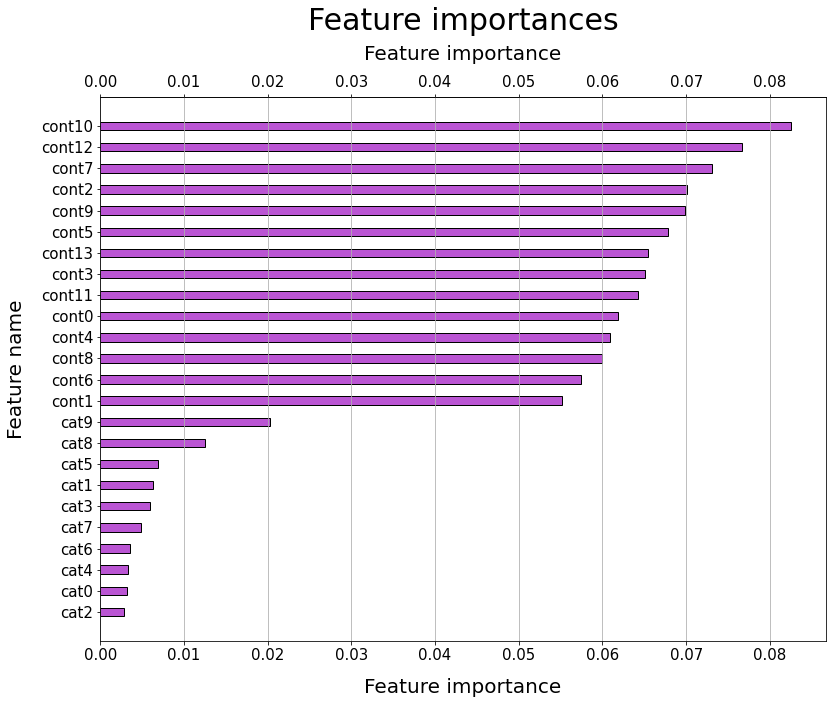

In [38]:
fig, ax = plt.subplots(figsize=(13, 10))
bars = ax.barh(df["Feature"], df["Importance"], height=0.4,
               color="mediumorchid", edgecolor="black")
ax.set_title("Feature importances", fontsize=30, pad=15)
ax.set_ylabel("Feature name", fontsize=20, labelpad=15)
ax.set_xlabel("Feature importance", fontsize=20, labelpad=15)
ax.set_yticks(df["Feature"])
ax.set_yticklabels(df["Feature"], fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.grid(axis="x")
# Adding labels on top
ax2 = ax.secondary_xaxis('top')
ax2.set_xlabel("Feature importance", fontsize=20, labelpad=15)
ax2.tick_params(axis="x", labelsize=15)

# Inverting y axis direction so the values are decreasing
plt.gca().invert_yaxis()

catの値が軒並み低い。
これはおかしい。

In [39]:
predictions = pd.DataFrame()
predictions["id"] = test["id"]
predictions["target"] = preds

predictions.to_csv('../data/submit/006_submission.csv', index=False, header=predictions.columns)
predictions.head()

,id,target
0,0,7.949243
1,5,8.284233
2,15,8.432804
3,16,8.429843
4,17,8.135039


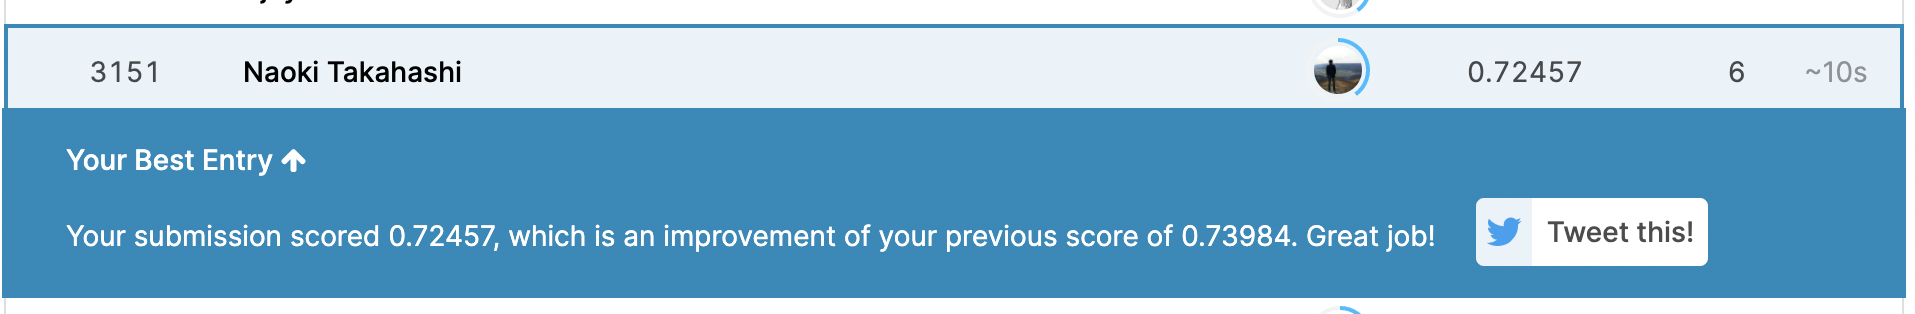

結構上昇した。<br>
まだ3000番台だが。

## 標準化
忘れていた

In [56]:
ss = StandardScaler()
train[num_features] = ss.fit_transform(train[num_features])
test[num_features]  = ss.transform(test[num_features])

In [57]:
X = train.drop(["id", "target"], axis=1)
X_test = test.drop(["id"], axis=1)
y = train["target"]

In [58]:
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size=0.25)

In [59]:
opt_params = {
    "objective":"regression",
    "metric":"rmse"
}

In [60]:
dtrain = lgbo.Dataset(train_X,label=train_y)
dval = lgbo.Dataset(valid_X,label=valid_y)

In [46]:
booster = lgbo.train(opt_params,dtrain,valid_sets=dval,verbose_eval=100)

[I 2021-08-24 12:59:14,759] A new study created in memory with name: no-name-9a0089dd-741d-4b3b-b1af-b0520e258bf8
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.72242
[200]	valid_0's rmse: 0.72033
[300]	valid_0's rmse: 0.719962
[400]	valid_0's rmse: 0.719977
[500]	valid_0's rmse: 0.71989
[600]	valid_0's rmse: 0.720085
[700]	valid_0's rmse: 0.72015
[800]	valid_0's rmse: 0.720199
[900]	valid_0's rmse: 0.720356


feature_fraction, val_score: 0.720770:  14%|#4        | 1/7 [00:05<00:30,  5.08s/it]

[1000]	valid_0's rmse: 0.72077
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.722206
[200]	valid_0's rmse: 0.719906
[300]	valid_0's rmse: 0.719322
[400]	valid_0's rmse: 0.719409
[500]	valid_0's rmse: 0.719574
[600]	valid_0's rmse: 0.719719
[700]	valid_0's rmse: 0.71979
[800]	valid_0's rmse: 0.719951
[900]	valid_0's rmse: 0.72016


feature_fraction, val_score: 0.720308:  29%|##8       | 2/7 [00:12<00:33,  6.65s/it]

[1000]	valid_0's rmse: 0.720308
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.722413
[200]	valid_0's rmse: 0.720481
[300]	valid_0's rmse: 0.719951
[400]	valid_0's rmse: 0.719754
[500]	valid_0's rmse: 0.719955
[600]	valid_0's rmse: 0.720115
[700]	valid_0's rmse: 0.720283
[800]	valid_0's rmse: 0.720481
[900]	valid_0's rmse: 0.720552


feature_fraction, val_score: 0.720308:  43%|####2     | 3/7 [00:18<00:24,  6.23s/it]

[1000]	valid_0's rmse: 0.720847
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.72258
[200]	valid_0's rmse: 0.72057
[300]	valid_0's rmse: 0.719886
[400]	valid_0's rmse: 0.719636
[500]	valid_0's rmse: 0.719743
[600]	valid_0's rmse: 0.719925
[700]	valid_0's rmse: 0.720161
[800]	valid_0's rmse: 0.720365
[900]	valid_0's rmse: 0.720616


feature_fraction, val_score: 0.720308:  57%|#####7    | 4/7 [00:25<00:19,  6.36s/it]

[1000]	valid_0's rmse: 0.72082
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.72228
[200]	valid_0's rmse: 0.720505
[300]	valid_0's rmse: 0.719991
[400]	valid_0's rmse: 0.719957
[500]	valid_0's rmse: 0.720031
[600]	valid_0's rmse: 0.720239
[700]	valid_0's rmse: 0.720295
[800]	valid_0's rmse: 0.720433
[900]	valid_0's rmse: 0.720819


feature_fraction, val_score: 0.720308:  71%|#######1  | 5/7 [00:30<00:11,  5.97s/it]

[1000]	valid_0's rmse: 0.721273
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.722675
[200]	valid_0's rmse: 0.720923
[300]	valid_0's rmse: 0.720427
[400]	valid_0's rmse: 0.72045
[500]	valid_0's rmse: 0.720651
[600]	valid_0's rmse: 0.720752
[700]	valid_0's rmse: 0.720943
[800]	valid_0's rmse: 0.721183
[900]	valid_0's rmse: 0.721294


feature_fraction, val_score: 0.720308:  86%|########5 | 6/7 [00:35<00:05,  5.61s/it]

[1000]	valid_0's rmse: 0.721464
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.722177
[200]	valid_0's rmse: 0.719799
[300]	valid_0's rmse: 0.719263
[400]	valid_0's rmse: 0.719075
[500]	valid_0's rmse: 0.719091
[600]	valid_0's rmse: 0.719255
[700]	valid_0's rmse: 0.719452
[800]	valid_0's rmse: 0.719727
[900]	valid_0's rmse: 0.719873


num_leaves, val_score: 0.720032:   0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.720032
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.72186
[200]	valid_0's rmse: 0.722627
[300]	valid_0's rmse: 0.723916
[400]	valid_0's rmse: 0.725326
[500]	valid_0's rmse: 0.72678
[600]	valid_0's rmse: 0.727948
[700]	valid_0's rmse: 0.728852
[800]	valid_0's rmse: 0.729748
[900]	valid_0's rmse: 0.730641
[1000]	valid_0's rmse: 0.731552


num_leaves, val_score: 0.720032:   5%|5         | 1/20 [00:13<04:13, 13.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.721063
[200]	valid_0's rmse: 0.720736
[300]	valid_0's rmse: 0.721325
[400]	valid_0's rmse: 0.722183
[500]	valid_0's rmse: 0.72297
[600]	valid_0's rmse: 0.723797
[700]	valid_0's rmse: 0.724413
[800]	valid_0's rmse: 0.72534
[900]	valid_0's rmse: 0.726248


num_leaves, val_score: 0.720032:  10%|#         | 2/20 [00:23<03:31, 11.75s/it]

[1000]	valid_0's rmse: 0.726984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.722111
[200]	valid_0's rmse: 0.723103
[300]	valid_0's rmse: 0.72451
[400]	valid_0's rmse: 0.725645
[500]	valid_0's rmse: 0.727031
[600]	valid_0's rmse: 0.728161
[700]	valid_0's rmse: 0.729366
[800]	valid_0's rmse: 0.730329
[900]	valid_0's rmse: 0.731379
[1000]	valid_0's rmse: 0.732152


num_leaves, val_score: 0.720032:  15%|#5        | 3/20 [00:40<03:58, 14.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.720947
[200]	valid_0's rmse: 0.720793
[300]	valid_0's rmse: 0.721679
[400]	valid_0's rmse: 0.72239
[500]	valid_0's rmse: 0.723259
[600]	valid_0's rmse: 0.723914
[700]	valid_0's rmse: 0.724883
[800]	valid_0's rmse: 0.725587
[900]	valid_0's rmse: 0.726044
[1000]	valid_0's rmse: 0.726903


num_leaves, val_score: 0.720032:  20%|##        | 4/20 [00:53<03:35, 13.45s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.7216
[200]	valid_0's rmse: 0.721977
[300]	valid_0's rmse: 0.722689
[400]	valid_0's rmse: 0.72394
[500]	valid_0's rmse: 0.724767
[600]	valid_0's rmse: 0.725635
[700]	valid_0's rmse: 0.726557
[800]	valid_0's rmse: 0.727479
[900]	valid_0's rmse: 0.728305
[1000]	valid_0's rmse: 0.728854


num_leaves, val_score: 0.720032:  25%|##5       | 5/20 [01:06<03:18, 13.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.721687
[200]	valid_0's rmse: 0.7215
[300]	valid_0's rmse: 0.722631
[400]	valid_0's rmse: 0.723531
[500]	valid_0's rmse: 0.724623
[600]	valid_0's rmse: 0.72557
[700]	valid_0's rmse: 0.726576
[800]	valid_0's rmse: 0.727414
[900]	valid_0's rmse: 0.728332
[1000]	valid_0's rmse: 0.729302


num_leaves, val_score: 0.720032:  30%|###       | 6/20 [01:17<02:58, 12.77s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.721272
[200]	valid_0's rmse: 0.721812
[300]	valid_0's rmse: 0.722995
[400]	valid_0's rmse: 0.724317
[500]	valid_0's rmse: 0.725598
[600]	valid_0's rmse: 0.726546
[700]	valid_0's rmse: 0.727659
[800]	valid_0's rmse: 0.728553
[900]	valid_0's rmse: 0.729408
[1000]	valid_0's rmse: 0.730356


num_leaves, val_score: 0.720032:  35%|###5      | 7/20 [01:29<02:42, 12.48s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.721144
[200]	valid_0's rmse: 0.720637
[300]	valid_0's rmse: 0.721425
[400]	valid_0's rmse: 0.722343
[500]	valid_0's rmse: 0.723222
[600]	valid_0's rmse: 0.724143
[700]	valid_0's rmse: 0.725069
[800]	valid_0's rmse: 0.726011
[900]	valid_0's rmse: 0.726762
[1000]	valid_0's rmse: 0.72765


num_leaves, val_score: 0.720032:  40%|####      | 8/20 [01:40<02:22, 11.84s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.72108
[200]	valid_0's rmse: 0.72062
[300]	valid_0's rmse: 0.720996
[400]	valid_0's rmse: 0.721566
[500]	valid_0's rmse: 0.722421
[600]	valid_0's rmse: 0.723072
[700]	valid_0's rmse: 0.72398
[800]	valid_0's rmse: 0.724592
[900]	valid_0's rmse: 0.725092


num_leaves, val_score: 0.720032:  45%|####5     | 9/20 [01:49<02:01, 11.02s/it]

[1000]	valid_0's rmse: 0.72572
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.72067
[200]	valid_0's rmse: 0.720222
[300]	valid_0's rmse: 0.720554
[400]	valid_0's rmse: 0.721424
[500]	valid_0's rmse: 0.721901
[600]	valid_0's rmse: 0.722818
[700]	valid_0's rmse: 0.723588
[800]	valid_0's rmse: 0.724175
[900]	valid_0's rmse: 0.724827
[1000]	valid_0's rmse: 0.725588


num_leaves, val_score: 0.720032:  50%|#####     | 10/20 [01:59<01:48, 10.82s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.722635
[200]	valid_0's rmse: 0.719957
[300]	valid_0's rmse: 0.719238
[400]	valid_0's rmse: 0.719043
[500]	valid_0's rmse: 0.718919
[600]	valid_0's rmse: 0.718971
[700]	valid_0's rmse: 0.719172
[800]	valid_0's rmse: 0.71926
[900]	valid_0's rmse: 0.719347


num_leaves, val_score: 0.719450:  55%|#####5    | 11/20 [02:06<01:24,  9.44s/it]

[1000]	valid_0's rmse: 0.71945
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.721804
[200]	valid_0's rmse: 0.719738
[300]	valid_0's rmse: 0.719322
[400]	valid_0's rmse: 0.719286
[500]	valid_0's rmse: 0.719363
[600]	valid_0's rmse: 0.719541
[700]	valid_0's rmse: 0.719578
[800]	valid_0's rmse: 0.719892
[900]	valid_0's rmse: 0.720116


num_leaves, val_score: 0.719450:  60%|######    | 12/20 [02:13<01:09,  8.69s/it]

[1000]	valid_0's rmse: 0.720339
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723813
[200]	valid_0's rmse: 0.720462
[300]	valid_0's rmse: 0.719411
[400]	valid_0's rmse: 0.718889
[500]	valid_0's rmse: 0.718547
[600]	valid_0's rmse: 0.71839
[700]	valid_0's rmse: 0.718337
[800]	valid_0's rmse: 0.718327
[900]	valid_0's rmse: 0.718236


num_leaves, val_score: 0.718323:  65%|######5   | 13/20 [02:19<00:54,  7.82s/it]

[1000]	valid_0's rmse: 0.718323
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.733136
[200]	valid_0's rmse: 0.729527
[300]	valid_0's rmse: 0.72743
[400]	valid_0's rmse: 0.726041
[500]	valid_0's rmse: 0.725
[600]	valid_0's rmse: 0.724147
[700]	valid_0's rmse: 0.723291
[800]	valid_0's rmse: 0.722651
[900]	valid_0's rmse: 0.722046


num_leaves, val_score: 0.718323:  70%|#######   | 14/20 [02:23<00:41,  6.95s/it]

[1000]	valid_0's rmse: 0.72144
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.721123
[200]	valid_0's rmse: 0.719707
[300]	valid_0's rmse: 0.719558
[400]	valid_0's rmse: 0.719841
[500]	valid_0's rmse: 0.720214
[600]	valid_0's rmse: 0.720448
[700]	valid_0's rmse: 0.720894
[800]	valid_0's rmse: 0.721331
[900]	valid_0's rmse: 0.721732


num_leaves, val_score: 0.718323:  75%|#######5  | 15/20 [02:32<00:36,  7.28s/it]

[1000]	valid_0's rmse: 0.72219
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.721271
[200]	valid_0's rmse: 0.719809
[300]	valid_0's rmse: 0.719962
[400]	valid_0's rmse: 0.720297
[500]	valid_0's rmse: 0.720497
[600]	valid_0's rmse: 0.721044
[700]	valid_0's rmse: 0.721477
[800]	valid_0's rmse: 0.72194
[900]	valid_0's rmse: 0.722205


num_leaves, val_score: 0.718323:  80%|########  | 16/20 [02:39<00:29,  7.44s/it]

[1000]	valid_0's rmse: 0.722785
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.736547
[200]	valid_0's rmse: 0.73382
[300]	valid_0's rmse: 0.732149
[400]	valid_0's rmse: 0.730953
[500]	valid_0's rmse: 0.730052
[600]	valid_0's rmse: 0.729357
[700]	valid_0's rmse: 0.728821
[800]	valid_0's rmse: 0.728384
[900]	valid_0's rmse: 0.728042


num_leaves, val_score: 0.718323:  85%|########5 | 17/20 [02:44<00:19,  6.57s/it]

[1000]	valid_0's rmse: 0.727695
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.722068
[200]	valid_0's rmse: 0.71979
[300]	valid_0's rmse: 0.719344
[400]	valid_0's rmse: 0.719306
[500]	valid_0's rmse: 0.719346
[600]	valid_0's rmse: 0.719425
[700]	valid_0's rmse: 0.719611
[800]	valid_0's rmse: 0.719836
[900]	valid_0's rmse: 0.720054


num_leaves, val_score: 0.718323:  90%|######### | 18/20 [02:51<00:13,  6.66s/it]

[1000]	valid_0's rmse: 0.720284
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.720974
[200]	valid_0's rmse: 0.720238
[300]	valid_0's rmse: 0.72047
[400]	valid_0's rmse: 0.721089
[500]	valid_0's rmse: 0.721873
[600]	valid_0's rmse: 0.722227
[700]	valid_0's rmse: 0.722722
[800]	valid_0's rmse: 0.72342
[900]	valid_0's rmse: 0.724068


num_leaves, val_score: 0.718323:  95%|#########5| 19/20 [03:00<00:07,  7.43s/it]

[1000]	valid_0's rmse: 0.724549
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.722461
[200]	valid_0's rmse: 0.720015
[300]	valid_0's rmse: 0.719266
[400]	valid_0's rmse: 0.719027
[500]	valid_0's rmse: 0.719016
[600]	valid_0's rmse: 0.718982
[700]	valid_0's rmse: 0.719023
[800]	valid_0's rmse: 0.71915
[900]	valid_0's rmse: 0.719286


bagging, val_score: 0.718323:   0%|          | 0/10 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.719466
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723941
[200]	valid_0's rmse: 0.720551
[300]	valid_0's rmse: 0.71945
[400]	valid_0's rmse: 0.718964
[500]	valid_0's rmse: 0.718606
[600]	valid_0's rmse: 0.718423
[700]	valid_0's rmse: 0.718266
[800]	valid_0's rmse: 0.718205
[900]	valid_0's rmse: 0.718215


bagging, val_score: 0.718246:  10%|#         | 1/10 [00:07<01:06,  7.37s/it]

[1000]	valid_0's rmse: 0.718246
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723902
[200]	valid_0's rmse: 0.720421
[300]	valid_0's rmse: 0.719509
[400]	valid_0's rmse: 0.719057
[500]	valid_0's rmse: 0.718718
[600]	valid_0's rmse: 0.718582
[700]	valid_0's rmse: 0.718415
[800]	valid_0's rmse: 0.718473
[900]	valid_0's rmse: 0.71855


bagging, val_score: 0.718246:  20%|##        | 2/10 [00:13<00:55,  6.92s/it]

[1000]	valid_0's rmse: 0.718579
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723741
[200]	valid_0's rmse: 0.720623
[300]	valid_0's rmse: 0.719449
[400]	valid_0's rmse: 0.718916
[500]	valid_0's rmse: 0.718676
[600]	valid_0's rmse: 0.718534
[700]	valid_0's rmse: 0.718594
[800]	valid_0's rmse: 0.718744
[900]	valid_0's rmse: 0.718691


bagging, val_score: 0.718246:  30%|###       | 3/10 [00:20<00:47,  6.75s/it]

[1000]	valid_0's rmse: 0.718802
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723673
[200]	valid_0's rmse: 0.720309
[300]	valid_0's rmse: 0.719423
[400]	valid_0's rmse: 0.718974
[500]	valid_0's rmse: 0.718691
[600]	valid_0's rmse: 0.718532
[700]	valid_0's rmse: 0.718484
[800]	valid_0's rmse: 0.718486
[900]	valid_0's rmse: 0.718386


bagging, val_score: 0.718246:  40%|####      | 4/10 [00:28<00:42,  7.11s/it]

[1000]	valid_0's rmse: 0.718492
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.724219
[200]	valid_0's rmse: 0.720709
[300]	valid_0's rmse: 0.719656
[400]	valid_0's rmse: 0.719074
[500]	valid_0's rmse: 0.718993
[600]	valid_0's rmse: 0.718998
[700]	valid_0's rmse: 0.719068
[800]	valid_0's rmse: 0.719107
[900]	valid_0's rmse: 0.719138


bagging, val_score: 0.718246:  50%|#####     | 5/10 [00:34<00:34,  6.85s/it]

[1000]	valid_0's rmse: 0.719442
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723716
[200]	valid_0's rmse: 0.720704
[300]	valid_0's rmse: 0.719526
[400]	valid_0's rmse: 0.719139
[500]	valid_0's rmse: 0.718873
[600]	valid_0's rmse: 0.71867
[700]	valid_0's rmse: 0.718755
[800]	valid_0's rmse: 0.718843
[900]	valid_0's rmse: 0.718835


bagging, val_score: 0.718246:  60%|######    | 6/10 [00:41<00:27,  6.80s/it]

[1000]	valid_0's rmse: 0.718931
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.724192
[200]	valid_0's rmse: 0.720988
[300]	valid_0's rmse: 0.719896
[400]	valid_0's rmse: 0.719345
[500]	valid_0's rmse: 0.719189
[600]	valid_0's rmse: 0.71904
[700]	valid_0's rmse: 0.719052
[800]	valid_0's rmse: 0.719056
[900]	valid_0's rmse: 0.719184


bagging, val_score: 0.718246:  70%|#######   | 7/10 [00:47<00:20,  6.76s/it]

[1000]	valid_0's rmse: 0.719327
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.724197
[200]	valid_0's rmse: 0.721277
[300]	valid_0's rmse: 0.720205
[400]	valid_0's rmse: 0.719726
[500]	valid_0's rmse: 0.719451
[600]	valid_0's rmse: 0.719232
[700]	valid_0's rmse: 0.7192
[800]	valid_0's rmse: 0.719407
[900]	valid_0's rmse: 0.719792


bagging, val_score: 0.718246:  80%|########  | 8/10 [00:55<00:14,  7.15s/it]

[1000]	valid_0's rmse: 0.719959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.72418
[200]	valid_0's rmse: 0.720936
[300]	valid_0's rmse: 0.719798
[400]	valid_0's rmse: 0.71944
[500]	valid_0's rmse: 0.719241
[600]	valid_0's rmse: 0.719279
[700]	valid_0's rmse: 0.719328
[800]	valid_0's rmse: 0.719409
[900]	valid_0's rmse: 0.719612


bagging, val_score: 0.718246:  90%|######### | 9/10 [01:02<00:06,  6.91s/it]

[1000]	valid_0's rmse: 0.719903
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723882
[200]	valid_0's rmse: 0.720345
[300]	valid_0's rmse: 0.719233
[400]	valid_0's rmse: 0.718718
[500]	valid_0's rmse: 0.718454
[600]	valid_0's rmse: 0.718413
[700]	valid_0's rmse: 0.718326
[800]	valid_0's rmse: 0.718385
[900]	valid_0's rmse: 0.718414


feature_fraction_stage2, val_score: 0.718246:   0%|          | 0/3 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.718564
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723813
[200]	valid_0's rmse: 0.720548
[300]	valid_0's rmse: 0.719604
[400]	valid_0's rmse: 0.71911
[500]	valid_0's rmse: 0.718787
[600]	valid_0's rmse: 0.718654
[700]	valid_0's rmse: 0.71852
[800]	valid_0's rmse: 0.718457
[900]	valid_0's rmse: 0.718551


feature_fraction_stage2, val_score: 0.718246:  33%|###3      | 1/3 [00:07<00:15,  7.73s/it]

[1000]	valid_0's rmse: 0.718613
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723941
[200]	valid_0's rmse: 0.720551
[300]	valid_0's rmse: 0.71945
[400]	valid_0's rmse: 0.718964
[500]	valid_0's rmse: 0.718606
[600]	valid_0's rmse: 0.718423
[700]	valid_0's rmse: 0.718266
[800]	valid_0's rmse: 0.718205
[900]	valid_0's rmse: 0.718215


feature_fraction_stage2, val_score: 0.718246:  67%|######6   | 2/3 [00:15<00:07,  7.54s/it]

[1000]	valid_0's rmse: 0.718246
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723724
[200]	valid_0's rmse: 0.720545
[300]	valid_0's rmse: 0.71967
[400]	valid_0's rmse: 0.719159
[500]	valid_0's rmse: 0.71886
[600]	valid_0's rmse: 0.718897
[700]	valid_0's rmse: 0.718762
[800]	valid_0's rmse: 0.71869
[900]	valid_0's rmse: 0.718764


regularization_factors, val_score: 0.718246:   0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.718775
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723941
[200]	valid_0's rmse: 0.720551
[300]	valid_0's rmse: 0.71945
[400]	valid_0's rmse: 0.718964
[500]	valid_0's rmse: 0.718606
[600]	valid_0's rmse: 0.718423
[700]	valid_0's rmse: 0.718266
[800]	valid_0's rmse: 0.718205
[900]	valid_0's rmse: 0.718215


regularization_factors, val_score: 0.718246:   5%|5         | 1/20 [00:07<02:24,  7.62s/it]

[1000]	valid_0's rmse: 0.718246
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723941
[200]	valid_0's rmse: 0.720551
[300]	valid_0's rmse: 0.71945
[400]	valid_0's rmse: 0.718964
[500]	valid_0's rmse: 0.718606
[600]	valid_0's rmse: 0.718423
[700]	valid_0's rmse: 0.718266
[800]	valid_0's rmse: 0.718205
[900]	valid_0's rmse: 0.718215


regularization_factors, val_score: 0.718246:  10%|#         | 2/20 [00:15<02:20,  7.81s/it]

[1000]	valid_0's rmse: 0.718246
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723941
[200]	valid_0's rmse: 0.720551
[300]	valid_0's rmse: 0.71945
[400]	valid_0's rmse: 0.718964
[500]	valid_0's rmse: 0.718606
[600]	valid_0's rmse: 0.718512
[700]	valid_0's rmse: 0.718383
[800]	valid_0's rmse: 0.718249
[900]	valid_0's rmse: 0.718329


regularization_factors, val_score: 0.718246:  15%|#5        | 3/20 [00:23<02:11,  7.75s/it]

[1000]	valid_0's rmse: 0.71839
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723952
[200]	valid_0's rmse: 0.720537
[300]	valid_0's rmse: 0.719541
[400]	valid_0's rmse: 0.719071
[500]	valid_0's rmse: 0.718622
[600]	valid_0's rmse: 0.718419
[700]	valid_0's rmse: 0.718323
[800]	valid_0's rmse: 0.718148
[900]	valid_0's rmse: 0.718036


regularization_factors, val_score: 0.718076:  20%|##        | 4/20 [00:31<02:04,  7.79s/it]

[1000]	valid_0's rmse: 0.718076
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723973
[200]	valid_0's rmse: 0.720399
[300]	valid_0's rmse: 0.719255
[400]	valid_0's rmse: 0.718842
[500]	valid_0's rmse: 0.718476
[600]	valid_0's rmse: 0.718276
[700]	valid_0's rmse: 0.718117
[800]	valid_0's rmse: 0.718094
[900]	valid_0's rmse: 0.718027


regularization_factors, val_score: 0.718076:  25%|##5       | 5/20 [00:38<01:56,  7.75s/it]

[1000]	valid_0's rmse: 0.71814
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723941
[200]	valid_0's rmse: 0.720551
[300]	valid_0's rmse: 0.71945
[400]	valid_0's rmse: 0.718964
[500]	valid_0's rmse: 0.718606
[600]	valid_0's rmse: 0.718423
[700]	valid_0's rmse: 0.718266
[800]	valid_0's rmse: 0.718205
[900]	valid_0's rmse: 0.718215


regularization_factors, val_score: 0.718076:  30%|###       | 6/20 [00:46<01:48,  7.76s/it]

[1000]	valid_0's rmse: 0.718246
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723941
[200]	valid_0's rmse: 0.720551
[300]	valid_0's rmse: 0.71945
[400]	valid_0's rmse: 0.718964
[500]	valid_0's rmse: 0.718606
[600]	valid_0's rmse: 0.718423
[700]	valid_0's rmse: 0.718266
[800]	valid_0's rmse: 0.718205
[900]	valid_0's rmse: 0.718215


regularization_factors, val_score: 0.718076:  35%|###5      | 7/20 [00:54<01:39,  7.66s/it]

[1000]	valid_0's rmse: 0.718246
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.724013
[200]	valid_0's rmse: 0.720248
[300]	valid_0's rmse: 0.719092
[400]	valid_0's rmse: 0.718512
[500]	valid_0's rmse: 0.718049
[600]	valid_0's rmse: 0.717839
[700]	valid_0's rmse: 0.717719
[800]	valid_0's rmse: 0.717793
[900]	valid_0's rmse: 0.717835


regularization_factors, val_score: 0.717851:  40%|####      | 8/20 [01:02<01:33,  7.78s/it]

[1000]	valid_0's rmse: 0.717851
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.72408
[200]	valid_0's rmse: 0.720575
[300]	valid_0's rmse: 0.719439
[400]	valid_0's rmse: 0.71887
[500]	valid_0's rmse: 0.718572
[600]	valid_0's rmse: 0.718367
[700]	valid_0's rmse: 0.718281
[800]	valid_0's rmse: 0.718178
[900]	valid_0's rmse: 0.71819


regularization_factors, val_score: 0.717851:  45%|####5     | 9/20 [01:09<01:24,  7.72s/it]

[1000]	valid_0's rmse: 0.718263
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723935
[200]	valid_0's rmse: 0.720419
[300]	valid_0's rmse: 0.719349
[400]	valid_0's rmse: 0.718864
[500]	valid_0's rmse: 0.718461
[600]	valid_0's rmse: 0.718343
[700]	valid_0's rmse: 0.718145
[800]	valid_0's rmse: 0.718052
[900]	valid_0's rmse: 0.718128


regularization_factors, val_score: 0.717851:  50%|#####     | 10/20 [01:17<01:17,  7.78s/it]

[1000]	valid_0's rmse: 0.718122
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723892
[200]	valid_0's rmse: 0.720107
[300]	valid_0's rmse: 0.71892
[400]	valid_0's rmse: 0.718403
[500]	valid_0's rmse: 0.718032
[600]	valid_0's rmse: 0.717856
[700]	valid_0's rmse: 0.717711
[800]	valid_0's rmse: 0.717664
[900]	valid_0's rmse: 0.717697


regularization_factors, val_score: 0.717782:  55%|#####5    | 11/20 [01:26<01:12,  8.07s/it]

[1000]	valid_0's rmse: 0.717782
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723649
[200]	valid_0's rmse: 0.719927
[300]	valid_0's rmse: 0.718664
[400]	valid_0's rmse: 0.718209
[500]	valid_0's rmse: 0.717857
[600]	valid_0's rmse: 0.717698
[700]	valid_0's rmse: 0.717593
[800]	valid_0's rmse: 0.717539
[900]	valid_0's rmse: 0.717504


regularization_factors, val_score: 0.717533:  60%|######    | 12/20 [01:35<01:07,  8.49s/it]

[1000]	valid_0's rmse: 0.717533
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.724037
[200]	valid_0's rmse: 0.720088
[300]	valid_0's rmse: 0.718607
[400]	valid_0's rmse: 0.718108
[500]	valid_0's rmse: 0.717768
[600]	valid_0's rmse: 0.717614
[700]	valid_0's rmse: 0.717522
[800]	valid_0's rmse: 0.717465
[900]	valid_0's rmse: 0.717445


regularization_factors, val_score: 0.717487:  65%|######5   | 13/20 [01:45<01:02,  8.92s/it]

[1000]	valid_0's rmse: 0.717487
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723941
[200]	valid_0's rmse: 0.720594
[300]	valid_0's rmse: 0.719378
[400]	valid_0's rmse: 0.718962
[500]	valid_0's rmse: 0.718668
[600]	valid_0's rmse: 0.71854
[700]	valid_0's rmse: 0.718341
[800]	valid_0's rmse: 0.718288
[900]	valid_0's rmse: 0.71828


regularization_factors, val_score: 0.717487:  70%|#######   | 14/20 [01:53<00:51,  8.57s/it]

[1000]	valid_0's rmse: 0.718385
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723909
[200]	valid_0's rmse: 0.720002
[300]	valid_0's rmse: 0.718663
[400]	valid_0's rmse: 0.718139
[500]	valid_0's rmse: 0.717792
[600]	valid_0's rmse: 0.717629
[700]	valid_0's rmse: 0.717403
[800]	valid_0's rmse: 0.717312
[900]	valid_0's rmse: 0.717266


regularization_factors, val_score: 0.717274:  75%|#######5  | 15/20 [02:01<00:42,  8.48s/it]

[1000]	valid_0's rmse: 0.717274
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723941
[200]	valid_0's rmse: 0.720549
[300]	valid_0's rmse: 0.719356
[400]	valid_0's rmse: 0.718915
[500]	valid_0's rmse: 0.718727
[600]	valid_0's rmse: 0.718689
[700]	valid_0's rmse: 0.718701
[800]	valid_0's rmse: 0.718593
[900]	valid_0's rmse: 0.718601


regularization_factors, val_score: 0.717274:  80%|########  | 16/20 [02:09<00:33,  8.27s/it]

[1000]	valid_0's rmse: 0.718589
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723941
[200]	valid_0's rmse: 0.720551
[300]	valid_0's rmse: 0.71945
[400]	valid_0's rmse: 0.718964
[500]	valid_0's rmse: 0.718606
[600]	valid_0's rmse: 0.718423
[700]	valid_0's rmse: 0.718266
[800]	valid_0's rmse: 0.718205
[900]	valid_0's rmse: 0.718215


regularization_factors, val_score: 0.717274:  85%|########5 | 17/20 [02:17<00:24,  8.18s/it]

[1000]	valid_0's rmse: 0.718246
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723888
[200]	valid_0's rmse: 0.720373
[300]	valid_0's rmse: 0.71939
[400]	valid_0's rmse: 0.718988
[500]	valid_0's rmse: 0.71859
[600]	valid_0's rmse: 0.718466
[700]	valid_0's rmse: 0.718436
[800]	valid_0's rmse: 0.718392
[900]	valid_0's rmse: 0.718387


regularization_factors, val_score: 0.717274:  90%|######### | 18/20 [02:25<00:16,  8.10s/it]

[1000]	valid_0's rmse: 0.718407
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723941
[200]	valid_0's rmse: 0.720546
[300]	valid_0's rmse: 0.719365
[400]	valid_0's rmse: 0.719004
[500]	valid_0's rmse: 0.718663
[600]	valid_0's rmse: 0.718501
[700]	valid_0's rmse: 0.718422
[800]	valid_0's rmse: 0.718354
[900]	valid_0's rmse: 0.718433


regularization_factors, val_score: 0.717274:  95%|#########5| 19/20 [02:32<00:07,  7.92s/it]

[1000]	valid_0's rmse: 0.718639
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.724049
[200]	valid_0's rmse: 0.720098
[300]	valid_0's rmse: 0.718803
[400]	valid_0's rmse: 0.718132
[500]	valid_0's rmse: 0.717808
[600]	valid_0's rmse: 0.717577
[700]	valid_0's rmse: 0.717501
[800]	valid_0's rmse: 0.717419
[900]	valid_0's rmse: 0.717388


min_data_in_leaf, val_score: 0.717274:   0%|          | 0/5 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.717489
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723909
[200]	valid_0's rmse: 0.720003
[300]	valid_0's rmse: 0.718691
[400]	valid_0's rmse: 0.718085
[500]	valid_0's rmse: 0.717699
[600]	valid_0's rmse: 0.717622
[700]	valid_0's rmse: 0.717408
[800]	valid_0's rmse: 0.717315
[900]	valid_0's rmse: 0.717215


min_data_in_leaf, val_score: 0.717220:  20%|##        | 1/5 [00:08<00:35,  8.87s/it]

[1000]	valid_0's rmse: 0.71722
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723909
[200]	valid_0's rmse: 0.720002
[300]	valid_0's rmse: 0.718552
[400]	valid_0's rmse: 0.718025
[500]	valid_0's rmse: 0.717607
[600]	valid_0's rmse: 0.717429
[700]	valid_0's rmse: 0.717452
[800]	valid_0's rmse: 0.717411
[900]	valid_0's rmse: 0.717374


min_data_in_leaf, val_score: 0.717220:  40%|####      | 2/5 [00:17<00:25,  8.66s/it]

[1000]	valid_0's rmse: 0.717484
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723909
[200]	valid_0's rmse: 0.720002
[300]	valid_0's rmse: 0.718656
[400]	valid_0's rmse: 0.717995
[500]	valid_0's rmse: 0.717516
[600]	valid_0's rmse: 0.717353
[700]	valid_0's rmse: 0.717208
[800]	valid_0's rmse: 0.717138
[900]	valid_0's rmse: 0.717021


min_data_in_leaf, val_score: 0.717058:  60%|######    | 3/5 [00:25<00:17,  8.52s/it]

[1000]	valid_0's rmse: 0.717058
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723909
[200]	valid_0's rmse: 0.720002
[300]	valid_0's rmse: 0.718583
[400]	valid_0's rmse: 0.717911
[500]	valid_0's rmse: 0.717557
[600]	valid_0's rmse: 0.717349
[700]	valid_0's rmse: 0.717235
[800]	valid_0's rmse: 0.717228
[900]	valid_0's rmse: 0.717215


min_data_in_leaf, val_score: 0.717058:  80%|########  | 4/5 [00:34<00:08,  8.58s/it]

[1000]	valid_0's rmse: 0.71731
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.243805
[100]	valid_0's rmse: 0.723909
[200]	valid_0's rmse: 0.720002
[300]	valid_0's rmse: 0.718552
[400]	valid_0's rmse: 0.718009
[500]	valid_0's rmse: 0.717617
[600]	valid_0's rmse: 0.717405
[700]	valid_0's rmse: 0.717372
[800]	valid_0's rmse: 0.717392
[900]	valid_0's rmse: 0.717313


min_data_in_leaf, val_score: 0.717058: 100%|##########| 5/5 [00:42<00:00,  8.55s/it]

[1000]	valid_0's rmse: 0.717367


In [62]:
%%time
# 交差検証（10は多い気がする）
splits = 10
skf = KFold(n_splits=splits, shuffle=True, random_state=42)

# Creating an array of zeros for storing "out of fold" predictions
oof_preds = np.zeros((X.shape[0],))
preds = 0
model_fi = 0
total_mean_rmse = 0

# Generating folds and making training and prediction for each of 10 folds
for num, (train_idx, valid_idx) in enumerate(skf.split(X)):
    X_train, X_valid = X.loc[train_idx], X.loc[valid_idx]
    y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]
    
    model = LGBMRegressor(**params)
    model.fit(X_train, y_train,
              verbose=False,
              # These three parameters will stop training before a model starts overfitting 
              eval_set=[(X_train, y_train), (X_valid, y_valid)],
              eval_metric="rmse",
              early_stopping_rounds=100,
              )
    
    # Getting mean test data predictions (i.e. devided by number of splits)
    preds += model.predict(X_test) / splits
    
    # Getting mean feature importances (i.e. devided by number of splits)
    model_fi += model.feature_importances_ / splits
    
    # Getting validation data predictions. Each fold model makes predictions on an unseen data.
    # So in the end it will be completely filled with unseen data predictions.
    # It will be used to evaluate hyperparameters performance only.
    oof_preds[valid_idx] = model.predict(X_valid)
    
    # Getting score for a fold model
    fold_rmse = np.sqrt(mean_squared_error(y_valid, oof_preds[valid_idx]))
    print(f"Fold {num} RMSE: {fold_rmse}")

    # Getting mean score of all fold models (i.e. devided by number of splits)
    total_mean_rmse += fold_rmse / splits
    
print(f"\nOverall RMSE: {total_mean_rmse}")

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.806920876467952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.806920876467952
[LightGBM] [Warning] lambda_l1 is set=1.8813403583442569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8813403583442569e-07
Fold 0 RMSE: 0.7247268575184218
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsampl

feature_fraction, val_score: inf:   0%|          | 0/7 [03:57<?, ?it/s]


Fold 8 RMSE: 0.7296309339160219
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7517015026012234e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7517015026012234e-06
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.806920876467952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.806920876467952
[LightGBM] [Warning] lambda_l1 is set=1.8813403583442569e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8813403583442569e-07
Fold 9 RMSE: 0.7228215165472223

Overall RMSE: 0.7260215800841946
CPU times: user 7min 16s, sys: 25.2 s, total: 7min 41s
Wall time: 1min 1s


In [47]:
# Creating a dataframe to be used for plotting
df = pd.DataFrame()
df["Feature"] = X.columns
# Extracting feature importances from the trained model
df["Importance"] = model_fi / model_fi.sum()
# Sorting the dataframe by feature importance
df.sort_values("Importance", axis=0, ascending=False, inplace=True)

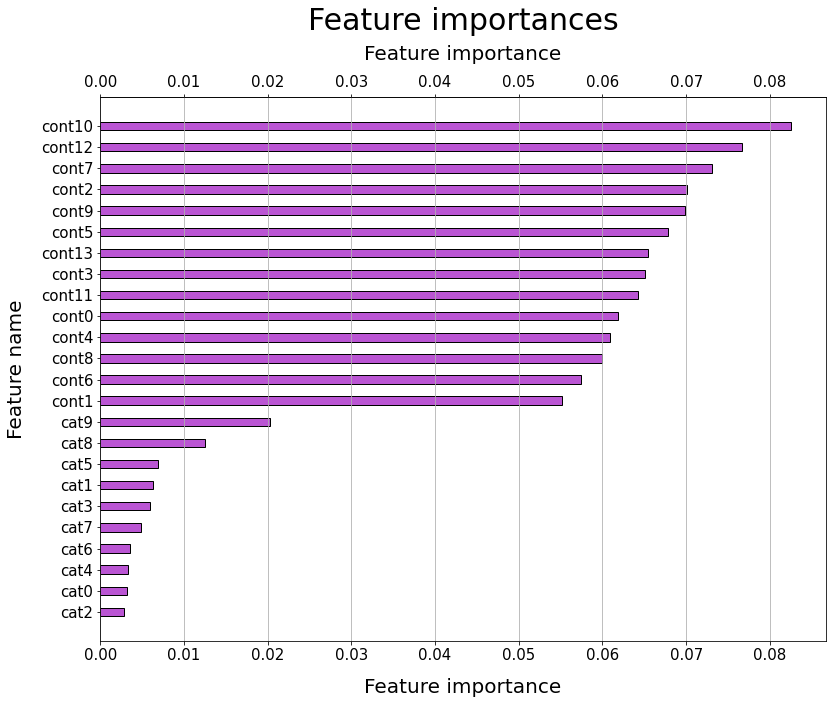

In [48]:
fig, ax = plt.subplots(figsize=(13, 10))
bars = ax.barh(df["Feature"], df["Importance"], height=0.4,
               color="mediumorchid", edgecolor="black")
ax.set_title("Feature importances", fontsize=30, pad=15)
ax.set_ylabel("Feature name", fontsize=20, labelpad=15)
ax.set_xlabel("Feature importance", fontsize=20, labelpad=15)
ax.set_yticks(df["Feature"])
ax.set_yticklabels(df["Feature"], fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.grid(axis="x")
# Adding labels on top
ax2 = ax.secondary_xaxis('top')
ax2.set_xlabel("Feature importance", fontsize=20, labelpad=15)
ax2.tick_params(axis="x", labelsize=15)

# Inverting y axis direction so the values are decreasing
plt.gca().invert_yaxis()

In [50]:
predictions = pd.DataFrame()
predictions["id"] = test["id"]
predictions["target"] = preds

predictions.to_csv('../data/submit/007_submission.csv', index=False, header=predictions.columns)
predictions.head()

,id,target
0,0,7.949243
1,5,8.284233
2,15,8.432804
3,16,8.429843
4,17,8.135039


スコア変わらず。標準化してもLightGBMに影響を与えないという意味では勉強になった。

In [70]:
train_df["cat0"] = pd.Categorical(train_df["cat0"])
train_df["cat1"] = pd.Categorical(train_df["cat1"])
train_df["cat2"] = pd.Categorical(train_df["cat2"])
train_df["cat3"] = pd.Categorical(train_df["cat3"])
train_df["cat4"] = pd.Categorical(train_df["cat4"])
train_df["cat5"] = pd.Categorical(train_df["cat5"])
train_df["cat6"] = pd.Categorical(train_df["cat6"])
train_df["cat7"] = pd.Categorical(train_df["cat7"])
train_df["cat8"] = pd.Categorical(train_df["cat8"])
train_df["cat9"] = pd.Categorical(train_df["cat9"])

In [71]:
X = train_df.drop(["id", "target"], axis=1)
X_test = test_df.drop(["id"], axis=1)
y = train_df["target"]

In [72]:
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size=0.25)

In [73]:
dtrain = lgbo.Dataset(train_X,label=train_y)
dval = lgbo.Dataset(valid_X,label=valid_y)

In [74]:
booster = lgbo.train(opt_params,dtrain,valid_sets=dval,verbose_eval=100,categorical_feature=cat_features)

[I 2021-08-24 13:36:21,376] A new study created in memory with name: no-name-6edb01d0-2840-4962-bad1-2303bf39b021
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.727322
[200]	valid_0's rmse: 0.724894
[300]	valid_0's rmse: 0.724454
[400]	valid_0's rmse: 0.724266
[500]	valid_0's rmse: 0.724183
[600]	valid_0's rmse: 0.724351
[700]	valid_0's rmse: 0.724473
[800]	valid_0's rmse: 0.724567
[900]	valid_0's rmse: 0.72478


feature_fraction, val_score: 0.725073:  14%|#4        | 1/7 [00:07<00:42,  7.05s/it]

[1000]	valid_0's rmse: 0.725073
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.72756
[200]	valid_0's rmse: 0.725731
[300]	valid_0's rmse: 0.725546
[400]	valid_0's rmse: 0.725437
[500]	valid_0's rmse: 0.725368
[600]	valid_0's rmse: 0.725506
[700]	valid_0's rmse: 0.725759
[800]	valid_0's rmse: 0.725992
[900]	valid_0's rmse: 0.726171


feature_fraction, val_score: 0.725073:  29%|##8       | 2/7 [00:12<00:29,  5.92s/it]

[1000]	valid_0's rmse: 0.726356
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.727408
[200]	valid_0's rmse: 0.72543
[300]	valid_0's rmse: 0.724975
[400]	valid_0's rmse: 0.7248
[500]	valid_0's rmse: 0.724695
[600]	valid_0's rmse: 0.724676
[700]	valid_0's rmse: 0.724992
[800]	valid_0's rmse: 0.72516
[900]	valid_0's rmse: 0.725394


feature_fraction, val_score: 0.725073:  43%|####2     | 3/7 [00:18<00:24,  6.04s/it]

[1000]	valid_0's rmse: 0.725621
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.727455
[200]	valid_0's rmse: 0.725787
[300]	valid_0's rmse: 0.725447
[400]	valid_0's rmse: 0.725342
[500]	valid_0's rmse: 0.725348
[600]	valid_0's rmse: 0.7255
[700]	valid_0's rmse: 0.725848
[800]	valid_0's rmse: 0.726087
[900]	valid_0's rmse: 0.7263


feature_fraction, val_score: 0.725073:  57%|#####7    | 4/7 [00:23<00:16,  5.50s/it]

[1000]	valid_0's rmse: 0.72652
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.727253
[200]	valid_0's rmse: 0.725568
[300]	valid_0's rmse: 0.725237
[400]	valid_0's rmse: 0.725271
[500]	valid_0's rmse: 0.725234
[600]	valid_0's rmse: 0.725426
[700]	valid_0's rmse: 0.725502
[800]	valid_0's rmse: 0.725737
[900]	valid_0's rmse: 0.725933


feature_fraction, val_score: 0.725073:  71%|#######1  | 5/7 [00:28<00:10,  5.36s/it]

[1000]	valid_0's rmse: 0.726171
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.727173
[200]	valid_0's rmse: 0.724709
[300]	valid_0's rmse: 0.724038
[400]	valid_0's rmse: 0.724008
[500]	valid_0's rmse: 0.724039
[600]	valid_0's rmse: 0.724084
[700]	valid_0's rmse: 0.724265
[800]	valid_0's rmse: 0.724344
[900]	valid_0's rmse: 0.724527


feature_fraction, val_score: 0.724643:  86%|########5 | 6/7 [00:35<00:05,  5.87s/it]

[1000]	valid_0's rmse: 0.724643
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.727388
[200]	valid_0's rmse: 0.725402
[300]	valid_0's rmse: 0.725115
[400]	valid_0's rmse: 0.724984
[500]	valid_0's rmse: 0.72507
[600]	valid_0's rmse: 0.725318
[700]	valid_0's rmse: 0.725474
[800]	valid_0's rmse: 0.725725
[900]	valid_0's rmse: 0.725888


num_leaves, val_score: 0.724643:   0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.726164
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.726365
[200]	valid_0's rmse: 0.725434
[300]	valid_0's rmse: 0.725937
[400]	valid_0's rmse: 0.72664
[500]	valid_0's rmse: 0.727411
[600]	valid_0's rmse: 0.728055
[700]	valid_0's rmse: 0.728848
[800]	valid_0's rmse: 0.729685
[900]	valid_0's rmse: 0.730377


num_leaves, val_score: 0.724643:   5%|5         | 1/20 [00:09<03:02,  9.59s/it]

[1000]	valid_0's rmse: 0.730981
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.727097
[200]	valid_0's rmse: 0.727494
[300]	valid_0's rmse: 0.72853
[400]	valid_0's rmse: 0.729485
[500]	valid_0's rmse: 0.730559
[600]	valid_0's rmse: 0.731881
[700]	valid_0's rmse: 0.732862
[800]	valid_0's rmse: 0.733711
[900]	valid_0's rmse: 0.734639
[1000]	valid_0's rmse: 0.735371


num_leaves, val_score: 0.724643:  10%|#         | 2/20 [00:22<03:28, 11.56s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.727077
[200]	valid_0's rmse: 0.727505
[300]	valid_0's rmse: 0.728815
[400]	valid_0's rmse: 0.730592
[500]	valid_0's rmse: 0.731925
[600]	valid_0's rmse: 0.732872
[700]	valid_0's rmse: 0.733713
[800]	valid_0's rmse: 0.734497
[900]	valid_0's rmse: 0.73507
[1000]	valid_0's rmse: 0.73594


num_leaves, val_score: 0.724643:  15%|#5        | 3/20 [00:35<03:30, 12.39s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.727143
[200]	valid_0's rmse: 0.727518
[300]	valid_0's rmse: 0.728766
[400]	valid_0's rmse: 0.729845
[500]	valid_0's rmse: 0.73098
[600]	valid_0's rmse: 0.732004
[700]	valid_0's rmse: 0.733176
[800]	valid_0's rmse: 0.734259
[900]	valid_0's rmse: 0.73507
[1000]	valid_0's rmse: 0.735679


num_leaves, val_score: 0.724643:  20%|##        | 4/20 [00:48<03:17, 12.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.726171
[200]	valid_0's rmse: 0.724854
[300]	valid_0's rmse: 0.725037
[400]	valid_0's rmse: 0.725463
[500]	valid_0's rmse: 0.72605
[600]	valid_0's rmse: 0.72655
[700]	valid_0's rmse: 0.7271
[800]	valid_0's rmse: 0.727727
[900]	valid_0's rmse: 0.728172


num_leaves, val_score: 0.724643:  25%|##5       | 5/20 [00:56<02:45, 11.05s/it]

[1000]	valid_0's rmse: 0.728539
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.726649
[200]	valid_0's rmse: 0.725894
[300]	valid_0's rmse: 0.726305
[400]	valid_0's rmse: 0.727103
[500]	valid_0's rmse: 0.72761
[600]	valid_0's rmse: 0.728329
[700]	valid_0's rmse: 0.729055
[800]	valid_0's rmse: 0.72966
[900]	valid_0's rmse: 0.730318


num_leaves, val_score: 0.724643:  30%|###       | 6/20 [01:06<02:27, 10.50s/it]

[1000]	valid_0's rmse: 0.730854
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.726376
[200]	valid_0's rmse: 0.724842
[300]	valid_0's rmse: 0.725187
[400]	valid_0's rmse: 0.725403
[500]	valid_0's rmse: 0.725792
[600]	valid_0's rmse: 0.726261
[700]	valid_0's rmse: 0.726811
[800]	valid_0's rmse: 0.727189
[900]	valid_0's rmse: 0.727857


num_leaves, val_score: 0.724643:  35%|###5      | 7/20 [01:14<02:07,  9.78s/it]

[1000]	valid_0's rmse: 0.728343
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.725952
[200]	valid_0's rmse: 0.724952
[300]	valid_0's rmse: 0.725181
[400]	valid_0's rmse: 0.725725
[500]	valid_0's rmse: 0.726169
[600]	valid_0's rmse: 0.726924
[700]	valid_0's rmse: 0.727491
[800]	valid_0's rmse: 0.727959
[900]	valid_0's rmse: 0.728488


num_leaves, val_score: 0.724643:  40%|####      | 8/20 [01:24<01:58,  9.86s/it]

[1000]	valid_0's rmse: 0.728937
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.726351
[200]	valid_0's rmse: 0.725731
[300]	valid_0's rmse: 0.7263
[400]	valid_0's rmse: 0.727081
[500]	valid_0's rmse: 0.727816
[600]	valid_0's rmse: 0.728567
[700]	valid_0's rmse: 0.729271
[800]	valid_0's rmse: 0.729989
[900]	valid_0's rmse: 0.730543
[1000]	valid_0's rmse: 0.731221


num_leaves, val_score: 0.724643:  45%|####5     | 9/20 [01:37<01:57, 10.70s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.726313
[200]	valid_0's rmse: 0.72616
[300]	valid_0's rmse: 0.727055
[400]	valid_0's rmse: 0.727999
[500]	valid_0's rmse: 0.728899
[600]	valid_0's rmse: 0.729817
[700]	valid_0's rmse: 0.730717
[800]	valid_0's rmse: 0.731404
[900]	valid_0's rmse: 0.732055
[1000]	valid_0's rmse: 0.732815


num_leaves, val_score: 0.724643:  50%|#####     | 10/20 [01:52<02:01, 12.11s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.733562
[200]	valid_0's rmse: 0.729721
[300]	valid_0's rmse: 0.727722
[400]	valid_0's rmse: 0.726481
[500]	valid_0's rmse: 0.725484
[600]	valid_0's rmse: 0.724835
[700]	valid_0's rmse: 0.724443
[800]	valid_0's rmse: 0.724014
[900]	valid_0's rmse: 0.723695


num_leaves, val_score: 0.723458:  55%|#####5    | 11/20 [01:58<01:33, 10.37s/it]

[1000]	valid_0's rmse: 0.723458
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.738138
[200]	valid_0's rmse: 0.734783
[300]	valid_0's rmse: 0.732678
[400]	valid_0's rmse: 0.731152
[500]	valid_0's rmse: 0.730154
[600]	valid_0's rmse: 0.729221
[700]	valid_0's rmse: 0.728574
[800]	valid_0's rmse: 0.727836
[900]	valid_0's rmse: 0.727142


num_leaves, val_score: 0.723458:  60%|######    | 12/20 [02:03<01:09,  8.70s/it]

[1000]	valid_0's rmse: 0.726591
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732822
[200]	valid_0's rmse: 0.728784
[300]	valid_0's rmse: 0.726828
[400]	valid_0's rmse: 0.725731
[500]	valid_0's rmse: 0.724986
[600]	valid_0's rmse: 0.724466
[700]	valid_0's rmse: 0.724109
[800]	valid_0's rmse: 0.723779
[900]	valid_0's rmse: 0.723616


num_leaves, val_score: 0.723436:  65%|######5   | 13/20 [02:09<00:54,  7.72s/it]

[1000]	valid_0's rmse: 0.723436
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.729701
[200]	valid_0's rmse: 0.726173
[300]	valid_0's rmse: 0.725
[400]	valid_0's rmse: 0.724406
[500]	valid_0's rmse: 0.724061
[600]	valid_0's rmse: 0.723828
[700]	valid_0's rmse: 0.723746
[800]	valid_0's rmse: 0.723735
[900]	valid_0's rmse: 0.723715


num_leaves, val_score: 0.723436:  70%|#######   | 14/20 [02:16<00:45,  7.59s/it]

[1000]	valid_0's rmse: 0.723762
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.726765
[200]	valid_0's rmse: 0.724918
[300]	valid_0's rmse: 0.724414
[400]	valid_0's rmse: 0.724312
[500]	valid_0's rmse: 0.724351
[600]	valid_0's rmse: 0.724588
[700]	valid_0's rmse: 0.724704
[800]	valid_0's rmse: 0.724917
[900]	valid_0's rmse: 0.725175


num_leaves, val_score: 0.723436:  75%|#######5  | 15/20 [02:25<00:40,  8.09s/it]

[1000]	valid_0's rmse: 0.72551
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.727081
[200]	valid_0's rmse: 0.724733
[300]	valid_0's rmse: 0.724318
[400]	valid_0's rmse: 0.724234
[500]	valid_0's rmse: 0.724237
[600]	valid_0's rmse: 0.72439
[700]	valid_0's rmse: 0.72449
[800]	valid_0's rmse: 0.724616
[900]	valid_0's rmse: 0.724922


num_leaves, val_score: 0.723436:  80%|########  | 16/20 [02:33<00:32,  8.02s/it]

[1000]	valid_0's rmse: 0.725256
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.726862
[200]	valid_0's rmse: 0.726681
[300]	valid_0's rmse: 0.727659
[400]	valid_0's rmse: 0.728829
[500]	valid_0's rmse: 0.729638
[600]	valid_0's rmse: 0.730522
[700]	valid_0's rmse: 0.731448
[800]	valid_0's rmse: 0.732093
[900]	valid_0's rmse: 0.732913
[1000]	valid_0's rmse: 0.733757


num_leaves, val_score: 0.723436:  85%|########5 | 17/20 [02:46<00:28,  9.48s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.726497
[200]	valid_0's rmse: 0.72507
[300]	valid_0's rmse: 0.72477
[400]	valid_0's rmse: 0.724827
[500]	valid_0's rmse: 0.725037
[600]	valid_0's rmse: 0.725342
[700]	valid_0's rmse: 0.725755
[800]	valid_0's rmse: 0.726003
[900]	valid_0's rmse: 0.726437


num_leaves, val_score: 0.723436:  90%|######### | 18/20 [02:55<00:18,  9.39s/it]

[1000]	valid_0's rmse: 0.726865
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.736142
[200]	valid_0's rmse: 0.732557
[300]	valid_0's rmse: 0.730197
[400]	valid_0's rmse: 0.728758
[500]	valid_0's rmse: 0.727639
[600]	valid_0's rmse: 0.726756
[700]	valid_0's rmse: 0.726014
[800]	valid_0's rmse: 0.725435
[900]	valid_0's rmse: 0.724845


num_leaves, val_score: 0.723436:  95%|#########5| 19/20 [03:01<00:08,  8.42s/it]

[1000]	valid_0's rmse: 0.724453
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.726539
[200]	valid_0's rmse: 0.725153
[300]	valid_0's rmse: 0.725106
[400]	valid_0's rmse: 0.725126
[500]	valid_0's rmse: 0.725413
[600]	valid_0's rmse: 0.725898
[700]	valid_0's rmse: 0.72624
[800]	valid_0's rmse: 0.726547
[900]	valid_0's rmse: 0.726923


bagging, val_score: 0.723436:   0%|          | 0/10 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.727168
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732863
[200]	valid_0's rmse: 0.728714
[300]	valid_0's rmse: 0.72691
[400]	valid_0's rmse: 0.725815
[500]	valid_0's rmse: 0.724717
[600]	valid_0's rmse: 0.724294
[700]	valid_0's rmse: 0.723942
[800]	valid_0's rmse: 0.723695
[900]	valid_0's rmse: 0.723431


bagging, val_score: 0.723248:  10%|#         | 1/10 [00:06<01:02,  6.97s/it]

[1000]	valid_0's rmse: 0.723248
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732917
[200]	valid_0's rmse: 0.728666
[300]	valid_0's rmse: 0.726688
[400]	valid_0's rmse: 0.725588
[500]	valid_0's rmse: 0.724833
[600]	valid_0's rmse: 0.724463
[700]	valid_0's rmse: 0.724167
[800]	valid_0's rmse: 0.723815
[900]	valid_0's rmse: 0.723708


bagging, val_score: 0.723248:  20%|##        | 2/10 [00:12<00:48,  6.12s/it]

[1000]	valid_0's rmse: 0.72353
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732766
[200]	valid_0's rmse: 0.728931
[300]	valid_0's rmse: 0.726562
[400]	valid_0's rmse: 0.725238
[500]	valid_0's rmse: 0.724722
[600]	valid_0's rmse: 0.724253
[700]	valid_0's rmse: 0.723836
[800]	valid_0's rmse: 0.723628
[900]	valid_0's rmse: 0.723513


bagging, val_score: 0.723248:  30%|###       | 3/10 [00:18<00:42,  6.05s/it]

[1000]	valid_0's rmse: 0.723436
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732791
[200]	valid_0's rmse: 0.728812
[300]	valid_0's rmse: 0.726851
[400]	valid_0's rmse: 0.725613
[500]	valid_0's rmse: 0.724964
[600]	valid_0's rmse: 0.724359
[700]	valid_0's rmse: 0.724027
[800]	valid_0's rmse: 0.723702
[900]	valid_0's rmse: 0.723546


bagging, val_score: 0.723248:  40%|####      | 4/10 [00:25<00:38,  6.36s/it]

[1000]	valid_0's rmse: 0.723313
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732824
[200]	valid_0's rmse: 0.728889
[300]	valid_0's rmse: 0.726802
[400]	valid_0's rmse: 0.725622
[500]	valid_0's rmse: 0.724746
[600]	valid_0's rmse: 0.724353
[700]	valid_0's rmse: 0.723946
[800]	valid_0's rmse: 0.723574
[900]	valid_0's rmse: 0.723314


bagging, val_score: 0.723096:  50%|#####     | 5/10 [00:32<00:33,  6.62s/it]

[1000]	valid_0's rmse: 0.723096
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732814
[200]	valid_0's rmse: 0.728728
[300]	valid_0's rmse: 0.72693
[400]	valid_0's rmse: 0.725671
[500]	valid_0's rmse: 0.724971
[600]	valid_0's rmse: 0.724511
[700]	valid_0's rmse: 0.724012
[800]	valid_0's rmse: 0.72365
[900]	valid_0's rmse: 0.723434


bagging, val_score: 0.723096:  60%|######    | 6/10 [00:39<00:27,  6.91s/it]

[1000]	valid_0's rmse: 0.723187
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732417
[200]	valid_0's rmse: 0.728469
[300]	valid_0's rmse: 0.726429
[400]	valid_0's rmse: 0.725381
[500]	valid_0's rmse: 0.724663
[600]	valid_0's rmse: 0.724194
[700]	valid_0's rmse: 0.723841
[800]	valid_0's rmse: 0.723652
[900]	valid_0's rmse: 0.723404


bagging, val_score: 0.723096:  70%|#######   | 7/10 [00:45<00:19,  6.51s/it]

[1000]	valid_0's rmse: 0.72334
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732446
[200]	valid_0's rmse: 0.728692
[300]	valid_0's rmse: 0.726789
[400]	valid_0's rmse: 0.725864
[500]	valid_0's rmse: 0.725029
[600]	valid_0's rmse: 0.724633
[700]	valid_0's rmse: 0.724154
[800]	valid_0's rmse: 0.723911
[900]	valid_0's rmse: 0.723725


bagging, val_score: 0.723096:  80%|########  | 8/10 [00:50<00:11,  5.91s/it]

[1000]	valid_0's rmse: 0.723681
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.73235
[200]	valid_0's rmse: 0.728263
[300]	valid_0's rmse: 0.726263
[400]	valid_0's rmse: 0.725364
[500]	valid_0's rmse: 0.724811
[600]	valid_0's rmse: 0.724195
[700]	valid_0's rmse: 0.723866
[800]	valid_0's rmse: 0.723747
[900]	valid_0's rmse: 0.723602


bagging, val_score: 0.723096:  90%|######### | 9/10 [00:55<00:05,  5.78s/it]

[1000]	valid_0's rmse: 0.723419
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728973
[300]	valid_0's rmse: 0.72662
[400]	valid_0's rmse: 0.725436
[500]	valid_0's rmse: 0.724615
[600]	valid_0's rmse: 0.724053
[700]	valid_0's rmse: 0.723703
[800]	valid_0's rmse: 0.723348
[900]	valid_0's rmse: 0.723201


feature_fraction_stage2, val_score: 0.723019:   0%|          | 0/3 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.723019
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728973
[300]	valid_0's rmse: 0.72662
[400]	valid_0's rmse: 0.725436
[500]	valid_0's rmse: 0.724615
[600]	valid_0's rmse: 0.724053
[700]	valid_0's rmse: 0.723703
[800]	valid_0's rmse: 0.723348
[900]	valid_0's rmse: 0.723201


feature_fraction_stage2, val_score: 0.723019:  33%|###3      | 1/3 [00:06<00:12,  6.33s/it]

[1000]	valid_0's rmse: 0.723019
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732762
[200]	valid_0's rmse: 0.728731
[300]	valid_0's rmse: 0.726524
[400]	valid_0's rmse: 0.725462
[500]	valid_0's rmse: 0.724645
[600]	valid_0's rmse: 0.724064
[700]	valid_0's rmse: 0.723731
[800]	valid_0's rmse: 0.723508
[900]	valid_0's rmse: 0.723271


feature_fraction_stage2, val_score: 0.723019:  67%|######6   | 2/3 [00:13<00:06,  6.64s/it]

[1000]	valid_0's rmse: 0.723137
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732707
[200]	valid_0's rmse: 0.728827
[300]	valid_0's rmse: 0.726555
[400]	valid_0's rmse: 0.725525
[500]	valid_0's rmse: 0.72474
[600]	valid_0's rmse: 0.724182
[700]	valid_0's rmse: 0.723806
[800]	valid_0's rmse: 0.72356
[900]	valid_0's rmse: 0.723315


regularization_factors, val_score: 0.723019:   0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.723148
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728973
[300]	valid_0's rmse: 0.72662
[400]	valid_0's rmse: 0.725436
[500]	valid_0's rmse: 0.724615
[600]	valid_0's rmse: 0.724053
[700]	valid_0's rmse: 0.723703
[800]	valid_0's rmse: 0.723348
[900]	valid_0's rmse: 0.723201


regularization_factors, val_score: 0.723019:   5%|5         | 1/20 [00:06<02:10,  6.85s/it]

[1000]	valid_0's rmse: 0.723019
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732758
[200]	valid_0's rmse: 0.728724
[300]	valid_0's rmse: 0.726404
[400]	valid_0's rmse: 0.725122
[500]	valid_0's rmse: 0.724419
[600]	valid_0's rmse: 0.723837
[700]	valid_0's rmse: 0.72352
[800]	valid_0's rmse: 0.723305
[900]	valid_0's rmse: 0.723124


regularization_factors, val_score: 0.722998:  10%|#         | 2/20 [00:14<02:14,  7.49s/it]

[1000]	valid_0's rmse: 0.722998
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728973
[300]	valid_0's rmse: 0.72662
[400]	valid_0's rmse: 0.725436
[500]	valid_0's rmse: 0.724615
[600]	valid_0's rmse: 0.724053
[700]	valid_0's rmse: 0.723703
[800]	valid_0's rmse: 0.723348
[900]	valid_0's rmse: 0.723201


regularization_factors, val_score: 0.722998:  15%|#5        | 3/20 [00:22<02:05,  7.40s/it]

[1000]	valid_0's rmse: 0.723019
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728973
[300]	valid_0's rmse: 0.72662
[400]	valid_0's rmse: 0.725436
[500]	valid_0's rmse: 0.724615
[600]	valid_0's rmse: 0.724053
[700]	valid_0's rmse: 0.723703
[800]	valid_0's rmse: 0.723348
[900]	valid_0's rmse: 0.723201


regularization_factors, val_score: 0.722998:  20%|##        | 4/20 [00:28<01:53,  7.08s/it]

[1000]	valid_0's rmse: 0.723019
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728973
[300]	valid_0's rmse: 0.72662
[400]	valid_0's rmse: 0.725436
[500]	valid_0's rmse: 0.724615
[600]	valid_0's rmse: 0.724053
[700]	valid_0's rmse: 0.723703
[800]	valid_0's rmse: 0.723348
[900]	valid_0's rmse: 0.723201


regularization_factors, val_score: 0.722998:  25%|##5       | 5/20 [00:35<01:45,  7.01s/it]

[1000]	valid_0's rmse: 0.723019
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728973
[300]	valid_0's rmse: 0.72662
[400]	valid_0's rmse: 0.725436
[500]	valid_0's rmse: 0.724615
[600]	valid_0's rmse: 0.724053
[700]	valid_0's rmse: 0.723703
[800]	valid_0's rmse: 0.723348
[900]	valid_0's rmse: 0.723201


regularization_factors, val_score: 0.722998:  30%|###       | 6/20 [00:42<01:37,  6.98s/it]

[1000]	valid_0's rmse: 0.723019
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728973
[300]	valid_0's rmse: 0.72662
[400]	valid_0's rmse: 0.725436
[500]	valid_0's rmse: 0.724615
[600]	valid_0's rmse: 0.724053
[700]	valid_0's rmse: 0.723703
[800]	valid_0's rmse: 0.723348
[900]	valid_0's rmse: 0.723201


regularization_factors, val_score: 0.722998:  35%|###5      | 7/20 [00:48<01:27,  6.72s/it]

[1000]	valid_0's rmse: 0.723019
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732847
[200]	valid_0's rmse: 0.728996
[300]	valid_0's rmse: 0.726514
[400]	valid_0's rmse: 0.725394
[500]	valid_0's rmse: 0.724709
[600]	valid_0's rmse: 0.724199
[700]	valid_0's rmse: 0.723881
[800]	valid_0's rmse: 0.723621
[900]	valid_0's rmse: 0.723398


regularization_factors, val_score: 0.722998:  40%|####      | 8/20 [00:55<01:20,  6.71s/it]

[1000]	valid_0's rmse: 0.723262
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728882
[300]	valid_0's rmse: 0.726486
[400]	valid_0's rmse: 0.725247
[500]	valid_0's rmse: 0.724432
[600]	valid_0's rmse: 0.723963
[700]	valid_0's rmse: 0.723679
[800]	valid_0's rmse: 0.723368
[900]	valid_0's rmse: 0.7231


regularization_factors, val_score: 0.722931:  45%|####5     | 9/20 [01:02<01:15,  6.86s/it]

[1000]	valid_0's rmse: 0.722931
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728973
[300]	valid_0's rmse: 0.72662
[400]	valid_0's rmse: 0.725436
[500]	valid_0's rmse: 0.724615
[600]	valid_0's rmse: 0.724053
[700]	valid_0's rmse: 0.723703
[800]	valid_0's rmse: 0.723334
[900]	valid_0's rmse: 0.72318


regularization_factors, val_score: 0.722931:  50%|#####     | 10/20 [01:10<01:11,  7.10s/it]

[1000]	valid_0's rmse: 0.722972
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732681
[200]	valid_0's rmse: 0.728739
[300]	valid_0's rmse: 0.726516
[400]	valid_0's rmse: 0.725281
[500]	valid_0's rmse: 0.724574
[600]	valid_0's rmse: 0.724051
[700]	valid_0's rmse: 0.723723
[800]	valid_0's rmse: 0.723436
[900]	valid_0's rmse: 0.723242


regularization_factors, val_score: 0.722931:  55%|#####5    | 11/20 [01:17<01:04,  7.20s/it]

[1000]	valid_0's rmse: 0.723118
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728973
[300]	valid_0's rmse: 0.72662
[400]	valid_0's rmse: 0.725436
[500]	valid_0's rmse: 0.724678
[600]	valid_0's rmse: 0.724055
[700]	valid_0's rmse: 0.723772
[800]	valid_0's rmse: 0.723461
[900]	valid_0's rmse: 0.723281


regularization_factors, val_score: 0.722931:  60%|######    | 12/20 [01:25<00:59,  7.47s/it]

[1000]	valid_0's rmse: 0.723124
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732846
[200]	valid_0's rmse: 0.728973
[300]	valid_0's rmse: 0.726621
[400]	valid_0's rmse: 0.725436
[500]	valid_0's rmse: 0.724678
[600]	valid_0's rmse: 0.724055
[700]	valid_0's rmse: 0.723762
[800]	valid_0's rmse: 0.72347
[900]	valid_0's rmse: 0.723242


regularization_factors, val_score: 0.722931:  65%|######5   | 13/20 [01:33<00:52,  7.53s/it]

[1000]	valid_0's rmse: 0.723109
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732696
[200]	valid_0's rmse: 0.728671
[300]	valid_0's rmse: 0.726218
[400]	valid_0's rmse: 0.724913
[500]	valid_0's rmse: 0.724168
[600]	valid_0's rmse: 0.723592
[700]	valid_0's rmse: 0.723273
[800]	valid_0's rmse: 0.722984
[900]	valid_0's rmse: 0.722754


regularization_factors, val_score: 0.722609:  70%|#######   | 14/20 [01:40<00:44,  7.48s/it]

[1000]	valid_0's rmse: 0.722609
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732853
[200]	valid_0's rmse: 0.728585
[300]	valid_0's rmse: 0.726305
[400]	valid_0's rmse: 0.725082
[500]	valid_0's rmse: 0.724262
[600]	valid_0's rmse: 0.723669
[700]	valid_0's rmse: 0.723349
[800]	valid_0's rmse: 0.723113
[900]	valid_0's rmse: 0.722914


regularization_factors, val_score: 0.722609:  75%|#######5  | 15/20 [01:47<00:36,  7.36s/it]

[1000]	valid_0's rmse: 0.722776
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732859
[200]	valid_0's rmse: 0.728736
[300]	valid_0's rmse: 0.726294
[400]	valid_0's rmse: 0.725044
[500]	valid_0's rmse: 0.724165
[600]	valid_0's rmse: 0.723632
[700]	valid_0's rmse: 0.723246
[800]	valid_0's rmse: 0.722889
[900]	valid_0's rmse: 0.722667


regularization_factors, val_score: 0.722492:  80%|########  | 16/20 [01:54<00:29,  7.30s/it]

[1000]	valid_0's rmse: 0.722492
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732698
[200]	valid_0's rmse: 0.728657
[300]	valid_0's rmse: 0.726324
[400]	valid_0's rmse: 0.724993
[500]	valid_0's rmse: 0.724273
[600]	valid_0's rmse: 0.723651
[700]	valid_0's rmse: 0.723292
[800]	valid_0's rmse: 0.723044
[900]	valid_0's rmse: 0.722791


regularization_factors, val_score: 0.722492:  85%|########5 | 17/20 [02:02<00:21,  7.30s/it]

[1000]	valid_0's rmse: 0.72261
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732571
[200]	valid_0's rmse: 0.728627
[300]	valid_0's rmse: 0.726188
[400]	valid_0's rmse: 0.72505
[500]	valid_0's rmse: 0.724326
[600]	valid_0's rmse: 0.72374
[700]	valid_0's rmse: 0.723431
[800]	valid_0's rmse: 0.723162
[900]	valid_0's rmse: 0.722916


regularization_factors, val_score: 0.722492:  90%|######### | 18/20 [02:09<00:14,  7.22s/it]

[1000]	valid_0's rmse: 0.722815
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732911
[200]	valid_0's rmse: 0.728811
[300]	valid_0's rmse: 0.726465
[400]	valid_0's rmse: 0.725293
[500]	valid_0's rmse: 0.724464
[600]	valid_0's rmse: 0.723897
[700]	valid_0's rmse: 0.723606
[800]	valid_0's rmse: 0.723301
[900]	valid_0's rmse: 0.723064


regularization_factors, val_score: 0.722492:  95%|#########5| 19/20 [02:16<00:07,  7.29s/it]

[1000]	valid_0's rmse: 0.722939
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732767
[200]	valid_0's rmse: 0.728737
[300]	valid_0's rmse: 0.726236
[400]	valid_0's rmse: 0.725024
[500]	valid_0's rmse: 0.724395
[600]	valid_0's rmse: 0.7238
[700]	valid_0's rmse: 0.723451
[800]	valid_0's rmse: 0.723177
[900]	valid_0's rmse: 0.722923


min_data_in_leaf, val_score: 0.722492:   0%|          | 0/5 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.722714
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732859
[200]	valid_0's rmse: 0.728736
[300]	valid_0's rmse: 0.726294
[400]	valid_0's rmse: 0.725044
[500]	valid_0's rmse: 0.724211
[600]	valid_0's rmse: 0.723565
[700]	valid_0's rmse: 0.723197
[800]	valid_0's rmse: 0.72299
[900]	valid_0's rmse: 0.722768


min_data_in_leaf, val_score: 0.722492:  20%|##        | 1/5 [00:07<00:29,  7.44s/it]

[1000]	valid_0's rmse: 0.722566
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732859
[200]	valid_0's rmse: 0.728736
[300]	valid_0's rmse: 0.726294
[400]	valid_0's rmse: 0.725044
[500]	valid_0's rmse: 0.724196
[600]	valid_0's rmse: 0.72358
[700]	valid_0's rmse: 0.723265
[800]	valid_0's rmse: 0.723014
[900]	valid_0's rmse: 0.722726


min_data_in_leaf, val_score: 0.722492:  40%|####      | 2/5 [00:14<00:22,  7.36s/it]

[1000]	valid_0's rmse: 0.722617
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732859
[200]	valid_0's rmse: 0.728736
[300]	valid_0's rmse: 0.726294
[400]	valid_0's rmse: 0.724986
[500]	valid_0's rmse: 0.724194
[600]	valid_0's rmse: 0.723551
[700]	valid_0's rmse: 0.723183
[800]	valid_0's rmse: 0.722989
[900]	valid_0's rmse: 0.722793


min_data_in_leaf, val_score: 0.722492:  60%|######    | 3/5 [00:22<00:14,  7.45s/it]

[1000]	valid_0's rmse: 0.722576
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732859
[200]	valid_0's rmse: 0.728736
[300]	valid_0's rmse: 0.726294
[400]	valid_0's rmse: 0.724986
[500]	valid_0's rmse: 0.724111
[600]	valid_0's rmse: 0.723487
[700]	valid_0's rmse: 0.723139
[800]	valid_0's rmse: 0.722935
[900]	valid_0's rmse: 0.722702


min_data_in_leaf, val_score: 0.722492:  80%|########  | 4/5 [00:30<00:07,  7.57s/it]

[1000]	valid_0's rmse: 0.722596
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 225000, number of used features: 24
[LightGBM] [Info] Start training from score 8.241032
[100]	valid_0's rmse: 0.732859
[200]	valid_0's rmse: 0.728736
[300]	valid_0's rmse: 0.726294
[400]	valid_0's rmse: 0.724944
[500]	valid_0's rmse: 0.724181
[600]	valid_0's rmse: 0.723615
[700]	valid_0's rmse: 0.72327
[800]	valid_0's rmse: 0.723033
[900]	valid_0's rmse: 0.722791


min_data_in_leaf, val_score: 0.722492: 100%|##########| 5/5 [00:37<00:00,  7.58s/it]

[1000]	valid_0's rmse: 0.722684


rmse: 0.722684という値に不安を感じる

In [75]:
booster.params

{'objective': 'regression',
 'metric': 'rmse',
 'feature_pre_filter': False,
 'lambda_l1': 9.646417268487799,
 'lambda_l2': 0.4896473762177135,
 'num_leaves': 7,
 'feature_fraction': 0.4,
 'bagging_fraction': 0.6977321987309166,
 'bagging_freq': 4,
 'min_child_samples': 20,
 'num_iterations': 1000,
 'early_stopping_round': None,
 'categorical_column': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [76]:
params_c = {'objective': 'regression',
 'metric': 'rmse',
 'feature_pre_filter': False,
 'lambda_l1': 9.646417268487799,
 'lambda_l2': 0.4896473762177135,
 'num_leaves': 7,
 'feature_fraction': 0.4,
 'bagging_fraction': 0.6977321987309166,
 'bagging_freq': 4,
 'min_child_samples': 20,
 'num_iterations': 1000}

In [82]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 299983
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   cat0    30000 non-null  category
 1   cat1    30000 non-null  category
 2   cat2    30000 non-null  category
 3   cat3    30000 non-null  category
 4   cat4    30000 non-null  category
 5   cat5    30000 non-null  category
 6   cat6    30000 non-null  category
 7   cat7    30000 non-null  category
 8   cat8    30000 non-null  category
 9   cat9    30000 non-null  category
 10  cont0   30000 non-null  float64 
 11  cont1   30000 non-null  float64 
 12  cont2   30000 non-null  float64 
 13  cont3   30000 non-null  float64 
 14  cont4   30000 non-null  float64 
 15  cont5   30000 non-null  float64 
 16  cont6   30000 non-null  float64 
 17  cont7   30000 non-null  float64 
 18  cont8   30000 non-null  float64 
 19  cont9   30000 non-null  float64 
 20  cont10  30000 non-null  float64 
 21  cont11  300

In [84]:
%%time
# 交差検証（10は多い気がする）
splits = 10
skf = KFold(n_splits=splits, shuffle=True, random_state=42)

# Creating an array of zeros for storing "out of fold" predictions
oof_preds = np.zeros((X.shape[0],))
preds = 0
model_fi = 0
total_mean_rmse = 0

# Generating folds and making training and prediction for each of 10 folds
for num, (train_idx, valid_idx) in enumerate(skf.split(X)):
    X_train, X_valid = X.loc[train_idx], X.loc[valid_idx]
    y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]
    
    model = LGBMRegressor(**params_c)
    model.fit(X_train, y_train,
              verbose=False,
              categorical_feature=cat_features,
              # These three parameters will stop training before a model starts overfitting 
              eval_set=[(X_train, y_train), (X_valid, y_valid)],
              eval_metric="rmse",
              early_stopping_rounds=100,
              )
    
    # Getting mean test data predictions (i.e. devided by number of splits)
    preds += model.predict(X_test) / splits
    
    # Getting mean feature importances (i.e. devided by number of splits)
    model_fi += model.feature_importances_ / splits
    
    # Getting validation data predictions. Each fold model makes predictions on an unseen data.
    # So in the end it will be completely filled with unseen data predictions.
    # It will be used to evaluate hyperparameters performance only.
    oof_preds[valid_idx] = model.predict(X_valid)
    
    # Getting score for a fold model
    fold_rmse = np.sqrt(mean_squared_error(y_valid, oof_preds[valid_idx]))
    print(f"Fold {num} RMSE: {fold_rmse}")

    # Getting mean score of all fold models (i.e. devided by number of splits)
    total_mean_rmse += fold_rmse / splits
    
print(f"\nOverall RMSE: {total_mean_rmse}")

ValueError: train and valid dataset categorical_feature do not match.

In [85]:
model = LGBMRegressor(**params_c)
model.fit(X_train, y_train,verbose=False,categorical_feature=cat_features)

LGBMRegressor(bagging_fraction=0.6977321987309166, bagging_freq=4,
              feature_fraction=0.4, feature_pre_filter=False,
              lambda_l1=9.646417268487799, lambda_l2=0.4896473762177135,
              metric='rmse', num_iterations=1000, num_leaves=7,
              objective='regression')

In [88]:
pred = model.predict(X_valid)

In [89]:
fold_rmse = np.sqrt(mean_squared_error(y_valid, pred))

In [90]:
print(f"RMSE: {fold_rmse}")

RMSE: 0.7186365583988485


さっきより良い値！

In [91]:
test_df["cat0"] = pd.Categorical(test_df["cat0"])
test_df["cat1"] = pd.Categorical(test_df["cat1"])
test_df["cat2"] = pd.Categorical(test_df["cat2"])
test_df["cat3"] = pd.Categorical(test_df["cat3"])
test_df["cat4"] = pd.Categorical(test_df["cat4"])
test_df["cat5"] = pd.Categorical(test_df["cat5"])
test_df["cat6"] = pd.Categorical(test_df["cat6"])
test_df["cat7"] = pd.Categorical(test_df["cat7"])
test_df["cat8"] = pd.Categorical(test_df["cat8"])
test_df["cat9"] = pd.Categorical(test_df["cat9"])

In [92]:
X_test = test_df.drop(["id"], axis=1)

In [93]:
preds = model.predict(X_test)

In [95]:
predictions = pd.DataFrame()
predictions["id"] = test["id"]
predictions["target"] = preds

predictions.to_csv('../data/submit/008_submission.csv', index=False, header=predictions.columns)
predictions.head()

,id,target
0,0,8.098481
1,5,8.378028
2,15,8.460566
3,16,8.520269
4,17,8.181585


結果は0.72143。だいぶ上昇した。